In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
from pandas.api.types import CategoricalDtype
import numpy as np   
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
#Task 1: Data Preparation

In [3]:
df=pd.read_csv("StarWars.csv",encoding='cp1252')

In [4]:
#lets see what are we dealing with

In [5]:
df.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return 

In [6]:
df.shape

(1187, 38)

In [7]:
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [8]:
#The column name does not make much sense right now 

In [9]:
#we can see that all unnamed is the option what are the relevent options lets see

In [10]:
df.iloc[0]

RespondentID                                                                                                                                                                              NaN
Have you seen any of the 6 films in the Star Wars franchise?                                                                                                                         Response
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                                                                Response
Which of the following Star Wars films have you seen? Please select all that apply.                                                                  Star Wars: Episode I  The Phantom Menace
Unnamed: 4                                                                                                                                        Star Wars: Episode II  Attack of the Clones
Unnamed: 5                                        

In [11]:
#lets form appropriate columns . 1st row show all options replacing all non informative unnamed shit aand add column which makes sense
columns_dict = {'RespondentID':'RespondentID','Have you seen any of the 6 films in the Star Wars franchise?':'Q1','Do you consider yourself to be a fan of the Star Wars film franchise?':'Q2',
          'Which of the following Star Wars films have you seen? Please select all that apply.':'Q3/O1','Unnamed: 4':'Q3/O2','Unnamed: 5':'Q3/O3','Unnamed: 6':'Q3/O4','Unnamed: 7':'Q3/O5','Unnamed: 8':'Q3/O6',
          'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'Q4/O1','Unnamed: 10':'Q4/O2','Unnamed: 11':'Q4/O3','Unnamed: 12':'Q4/O4',
          'Unnamed: 13':'Q4/O5','Unnamed: 14':'Q4/O6','Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Q5/O1','Unnamed: 16':'Q5/O2', 'Unnamed: 17':'Q5/O3', 'Unnamed: 18':'Q5/O4', 'Unnamed: 19':'Q5/O5',
          'Unnamed: 20':'Q5/O6', 'Unnamed: 21':'Q5/O7', 'Unnamed: 22':'Q5/O8', 'Unnamed: 23':'Q5/O9','Unnamed: 24':'Q5/O10', 'Unnamed: 25':'Q5/O11', 'Unnamed: 26':'Q5/O12', 'Unnamed: 27':'Q5/O13','Unnamed: 28':'Q5/O14',
          'Which character shot first?':'Q6','Are you familiar with the Expanded Universe?':'Q7','Do you consider yourself to be a fan of the Expanded Universe?Œæ':'Q8',
          'Do you consider yourself to be a fan of the Star Trek franchise?':'Q9','Gender':'Gender','Age':'Age','Household Income':'Household Income','Education':'Education','Location (Census Region)':'Location (Census Region)'}

In [12]:
df.columns=df.columns.to_series().map(columns_dict)

In [13]:
df.columns#new column names

Index(['RespondentID', 'Q1', 'Q2', 'Q3/O1', 'Q3/O2', 'Q3/O3', 'Q3/O4', 'Q3/O5',
       'Q3/O6', 'Q4/O1', 'Q4/O2', 'Q4/O3', 'Q4/O4', 'Q4/O5', 'Q4/O6', 'Q5/O1',
       'Q5/O2', 'Q5/O3', 'Q5/O4', 'Q5/O5', 'Q5/O6', 'Q5/O7', 'Q5/O8', 'Q5/O9',
       'Q5/O10', 'Q5/O11', 'Q5/O12', 'Q5/O13', 'Q5/O14', 'Q6', 'Q7', 'Q8',
       'Q9', 'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

In [14]:
#make something to track our impute question imputation
q={'questions':['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9'],'Details':['Have you seen any of the 6 films in the Star Wars franchise?','Do you consider yourself to be a fan of the Star Wars film franchise?','Which of the following Star Wars films have you seen? Please select all that apply.','Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.','Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.','Which character shot first?','Are you familiar with the Expanded Universe?','Do you consider yourself to be a fan of the Expanded Universe?','Do you consider yourself to be a fan of the Star Trek franchise?']}
quesions=pd.DataFrame(data=q)
pd.options.display.max_colwidth = 150
quesions

,questions,Details
0,Q1,Have you seen any of the 6 films in the Star Wars franchise?
1,Q2,Do you consider yourself to be a fan of the Star Wars film franchise?
2,Q3,Which of the following Star Wars films have you seen? Please select all that apply.
3,Q4,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
4,Q5,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her."
5,Q6,Which character shot first?
6,Q7,Are you familiar with the Expanded Universe?
7,Q8,Do you consider yourself to be a fan of the Expanded Universe?
8,Q9,Do you consider yourself to be a fan of the Star Trek franchise?


In [15]:
#making dict to keep track of imputed options
options_dict=['Q3/O1', 'Q3/O2', 'Q3/O3', 'Q3/O4', 'Q3/O5',
       'Q3/O6', 'Q4/O1', 'Q4/O2', 'Q4/O3', 'Q4/O4', 'Q4/O5', 'Q4/O6', 'Q5/O1',
       'Q5/O2', 'Q5/O3', 'Q5/O4', 'Q5/O5', 'Q5/O6', 'Q5/O7', 'Q5/O8', 'Q5/O9',
       'Q5/O10', 'Q5/O11', 'Q5/O12', 'Q5/O12', 'Q5/O13']

options={}
for col in df.columns:
    if col in options_dict:
        options.update({col:df.loc[0,col]})
        
options 

{'Q3/O1': 'Star Wars: Episode I  The Phantom Menace',
 'Q3/O2': 'Star Wars: Episode II  Attack of the Clones',
 'Q3/O3': 'Star Wars: Episode III  Revenge of the Sith',
 'Q3/O4': 'Star Wars: Episode IV  A New Hope',
 'Q3/O5': 'Star Wars: Episode V The Empire Strikes Back',
 'Q3/O6': 'Star Wars: Episode VI Return of the Jedi',
 'Q4/O1': 'Star Wars: Episode I  The Phantom Menace',
 'Q4/O2': 'Star Wars: Episode II  Attack of the Clones',
 'Q4/O3': 'Star Wars: Episode III  Revenge of the Sith',
 'Q4/O4': 'Star Wars: Episode IV  A New Hope',
 'Q4/O5': 'Star Wars: Episode V The Empire Strikes Back',
 'Q4/O6': 'Star Wars: Episode VI Return of the Jedi',
 'Q5/O1': 'Han Solo',
 'Q5/O2': 'Luke Skywalker',
 'Q5/O3': 'Princess Leia Organa',
 'Q5/O4': 'Anakin Skywalker',
 'Q5/O5': 'Obi Wan Kenobi',
 'Q5/O6': 'Emperor Palpatine',
 'Q5/O7': 'Darth Vader',
 'Q5/O8': 'Lando Calrissian',
 'Q5/O9': 'Boba Fett',
 'Q5/O10': 'C-3P0',
 'Q5/O11': 'R2 D2',
 'Q5/O12': 'Jar Jar Binks',
 'Q5/O13': 'Padme Amidala'}

In [16]:
df=df.iloc[1:]
df.head()

,RespondentID,Q1,Q2,Q3/O1,Q3/O2,Q3/O3,Q3/O4,Q3/O5,Q3/O6,Q4/O1,Q4/O2,Q4/O3,Q4/O4,Q4/O5,Q4/O6,Q5/O1,Q5/O2,Q5/O3,Q5/O4,Q5/O5,Q5/O6,Q5/O7,Q5/O8,Q5/O9,Q5/O10,Q5/O11,Q5/O12,Q5/O13,Q5/O14,Q6,Q7,Q8,Q9,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [17]:
#by general observation if someone did not responded to q2 all other values are nan
df.loc[(df['Q2'].isnull())&(df['Q1']=='Yes')]

,RespondentID,Q1,Q2,Q3/O1,Q3/O2,Q3/O3,Q3/O4,Q3/O5,Q3/O6,Q4/O1,Q4/O2,Q4/O3,Q4/O4,Q4/O5,Q4/O6,Q5/O1,Q5/O2,Q5/O3,Q5/O4,Q5/O5,Q5/O6,Q5/O7,Q5/O8,Q5/O9,Q5/O10,Q5/O11,Q5/O12,Q5/O13,Q5/O14,Q6,Q7,Q8,Q9,Gender,Age,Household Income,Education,Location (Census Region)
11,3.292638e+09,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,3.291669e+09,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,3.291570e+09,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,3.291470e+09,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,3.291420e+09,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,3.291406e+09,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,3.291341e+09,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,3.291038e+09,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,3.291022e+09,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,3.291007e+09,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#removing all these values i am not removing No values as it gives some demographics info on ehat kind of people don't like movies
df=df.drop(df[(df.Q2.isnull())&(df.Q1=='Yes')].index)

In [19]:
df.loc[df['Q1']=='No'].shape[0]

250

In [20]:
df['Q2'].isnull().sum()#all remaning value na in q2 comes from people who have not watched any movies

250

In [21]:
#now we are sorted with columns and preserve all info so lets find out what's wrong
df['Q1'].value_counts().index#we can see whitespace

Index(['Yes', 'No', 'Yes '], dtype='object')

In [22]:
df['Q1']=df['Q1'].str.strip()

In [23]:
df['Q2'].value_counts()

Yes     551
No      283
Noo       1
Yess      1
Name: Q2, dtype: int64

In [24]:
col_q2={'No':0,'Noo':0,'Yes':1,'Yess':1}
df['Q2']=df['Q2'].replace(col_q2)

In [25]:
#now we are just going to treat yes data as all no in q2 leve rest of column as na
df_yes=df.loc[df['Q1']=='Yes']
df_yes.shape

(836, 38)

In [26]:
#for question 3 we have name of series as person have watched it and nan if not
#writing a finction to replace it with 1 and 0

def impute_val(col):
    df_yes.loc[df[col].notnull(),col]=1
    df_yes.loc[df[col].isnull(),col]=0

q3_options=['Q3/O1','Q3/O2','Q3/O3','Q3/O4','Q3/O5','Q3/O6']
#writing a loop to automate
for col in q3_options:
    impute_val(col)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [27]:
#for question 4
#levels are 1,2,3,4,5,6 and we will make 0 for nan values(noooooo)
#since it is ordinal so imputing 0 is not logical

#MANUAL IMPUTE

df_yes.loc[(df_yes['Q4/O3'].isnull()),'Q4/O3']=6  
df_yes.loc[(df_yes['Q4/O1'].isnull()),'Q4/O1']=6  
# o3 and o1 have na value but it is in order like 1,2,3,4,5 and for say 6 is missing so imputing the remaning shit

In [28]:
df_yes['Q4/O1']=df_yes['Q4/O1'].astype(int)
df_yes['Q4/O2']=df_yes['Q4/O2'].astype(int)
df_yes['Q4/O3']=df_yes['Q4/O3'].astype(int)
df_yes['Q4/O4']=df_yes['Q4/O4'].astype(int)
df_yes['Q4/O5']=df_yes['Q4/O5'].astype(int)
df_yes['Q4/O6']=df_yes['Q4/O6'].astype(int)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [29]:
df_yes['Q5/O1'].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Q5/O1, dtype: int64

In [30]:
df_yes['Q8'].isnull().sum()

623

In [31]:
df_yes['Q8'].value_counts()

No      114
Yes      98
Yess      1
Name: Q8, dtype: int64

In [32]:
df_yes['Q8']=df_yes['Q8'].fillna('Not Answred')
df_yes['Q8']=df_yes['Q8'].replace({'Yess':'Yes'})

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [33]:
df_yes['Q9'].value_counts()

Yes    414
No     412
Noo      1
yes      1
Name: Q9, dtype: int64

In [34]:
df_yes['Q9']=df_yes['Q9'].replace({'yes':'Yes','Noo':'No'})

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
df_yes['Gender'].value_counts()

Male      423
Female    394
female      2
F           1
Name: Gender, dtype: int64

In [36]:
gender_dict={"Male":"Male","Female":"Female","female":"Female","F":"Female","male":"Male"}
df_yes['Gender']=df_yes['Gender'].replace(gender_dict)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [37]:
df_yes['Age'].value_counts()

45-60    240
30-44    207
> 60     193
18-29    179
500        1
Name: Age, dtype: int64

In [38]:
#500 dosent makes sense so remove
df_yes['Age']=df_yes['Age'].drop(df_yes[df_yes.Age=='500'].index)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [39]:
#NULL VALUES
for col in df_yes.columns:
    print(col, df_yes[col].isnull().sum())

RespondentID 0
Q1 0
Q2 0
Q3/O1 0
Q3/O2 0
Q3/O3 0
Q3/O4 0
Q3/O5 0
Q3/O6 0
Q4/O1 0
Q4/O2 0
Q4/O3 0
Q4/O4 0
Q4/O5 0
Q4/O6 0
Q5/O1 7
Q5/O2 5
Q5/O3 5
Q5/O4 13
Q5/O5 11
Q5/O6 22
Q5/O7 10
Q5/O8 16
Q5/O9 24
Q5/O10 9
Q5/O11 6
Q5/O12 15
Q5/O13 22
Q5/O14 10
Q6 8
Q7 8
Q8 0
Q9 8
Gender 16
Age 17
Household Income 161
Education 20
Location (Census Region) 18


# BUILDING MODEL

In [40]:
df_knn=df_yes.iloc[:,2:]
df_topredict=df_knn.loc[df_yes['Household Income'].isnull(),]

In [41]:
df_topredict=df_topredict.drop('Household Income',axis=1)
df_topredict=df_topredict.dropna()

In [42]:
df_knn=df_knn.dropna()

In [43]:
num_encode_q5={'Unfamiliar (N/A)':0,'Very unfavorably':1,'Somewhat unfavorably':2,'Neither favorably nor unfavorably (neutral)':3,'Somewhat favorably':4,'Very favorably':5}

df_knn.loc[:,'Q5/O1':'Q5/O14']=df_knn.loc[:,'Q5/O1':'Q5/O14'].replace(num_encode_q5)

df_topredict.loc[:,'Q5/O1':'Q5/O14']=df_topredict.loc[:,'Q5/O1':'Q5/O14'].replace(num_encode_q5)

In [44]:
df_knn['Q5/O1'].dtype

dtype('int64')

In [45]:
df_knn=pd.concat([df_knn,pd.get_dummies(df_knn['Q6'],prefix=['Q6'])],axis=1)#SUCCESS
df_knn=pd.concat([df_knn,pd.get_dummies(df_knn['Q8'],prefix=['Q8'])],axis=1)#SUCCESS
df_knn=pd.concat([df_knn,pd.get_dummies(df_knn['Location (Census Region)'],prefix=['LSR'])],axis=1)#SUCCESS
df_knn=df_knn.drop(['Q6','Q8','Location (Census Region)'],axis=1)#SUCCESS


df_topredict=pd.concat([df_topredict,pd.get_dummies(df_topredict['Q6'],prefix=['Q6'])],axis=1)#SUCCESS
df_topredict=pd.concat([df_topredict,pd.get_dummies(df_topredict['Q8'],prefix=['Q8'])],axis=1)#SUCCESS
df_topredict=pd.concat([df_topredict,pd.get_dummies(df_topredict['Location (Census Region)'],prefix=['LSR'])],axis=1)#SUCCESS
df_topredict=df_topredict.drop(['Q6','Q8','Location (Census Region)'],axis=1)#SUCCESS

In [46]:
df_topredict['Q7'].value_counts()

No     98
Yes    32
Name: Q7, dtype: int64

In [47]:
def binary_conv(col):
    df_knn.loc[df_knn[col]=='No',col]=0
    df_knn.loc[df_knn[col]=='Yes',col]=1
    
def binary_conv_pre(col):
    df_topredict.loc[df_topredict[col]=='No',col]=0
    df_topredict.loc[df_topredict[col]=='Yes',col]=1
    
binary_conv('Q7')#success
binary_conv('Q9')#success

binary_conv_pre('Q7')#success
binary_conv_pre('Q9')#success

In [48]:
df_knn.loc[df_knn['Gender']=='Female','Gender']=0#success
df_knn.loc[df_knn['Gender']=='Male','Gender']=1#success


df_topredict.loc[df_topredict['Gender']=='Female','Gender']=0#success
df_topredict.loc[df_topredict['Gender']=='Male','Gender']=1#success

In [49]:
df_knn['Household Income'].value_counts()

$50,000 - $99,999      219
$25,000 - $49,999      132
$100,000 - $149,999    103
$0 - $24,999            85
$150,000+               70
Name: Household Income, dtype: int64

In [50]:
num_encode_age={'18-29':1,'30-44':2,'45-60':3,'> 60':4}
num_encode_edu={'Less than high school degree':1,'High school degree':2,'Some college or Associate degree':3,'Bachelor degree':4,'Graduate degree':5}
num_encode_house_inc={'$0 - $24,999':1,'$25,000 - $49,999':2,'$50,000 - $99,999':3,'$100,000 - $149,999':4,'$150,000+':5}

In [51]:
df_knn['Age']=df_knn['Age'].replace(num_encode_age)#success
df_knn['Education']=df_knn['Education'].replace(num_encode_edu)#success
df_knn['Household Income']=df_knn['Household Income'].replace(num_encode_house_inc)#success


df_topredict['Age']=df_topredict['Age'].replace(num_encode_age)#success
df_topredict['Education']=df_topredict['Education'].replace(num_encode_edu)#success

In [52]:

df_topredict['Q4/O1']=df_topredict['Q4/O1'].astype(int)
df_topredict['Q4/O2']=df_topredict['Q4/O2'].astype(int)
df_topredict['Q4/O3']=df_topredict['Q4/O3'].astype(int)
df_topredict['Q4/O4']=df_topredict['Q4/O4'].astype(int)
df_topredict['Q4/O5']=df_topredict['Q4/O5'].astype(int)
df_topredict['Q4/O6']=df_topredict['Q4/O6'].astype(int)

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [54]:
y=df_knn.loc[:,'Household Income']
df_knn=df_knn.drop('Household Income',axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_knn, y, test_size=0.33, random_state=42)

In [55]:
parma={'max_depth':[3,4,5,6,7,8,9,10,11,12,13,14,15,16],'criterion':('gini','entropy')}
clf_gini = DecisionTreeClassifier(random_state = 100) 
cv=GridSearchCV(estimator=clf_gini,param_grid=parma,cv=5)
cv.fit(X_train, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 'criterion': ('gini', 'entropy')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [57]:
y_pred = cv.predict(X_test)
accuracy_score(y_test,y_pred)*100

37.81094527363184

In [58]:
res=y_pred = cv.predict(df_topredict)

In [59]:
df_yes.head()

,RespondentID,Q1,Q2,Q3/O1,Q3/O2,Q3/O3,Q3/O4,Q3/O5,Q3/O6,Q4/O1,Q4/O2,Q4/O3,Q4/O4,Q4/O5,Q4/O6,Q5/O1,Q5/O2,Q5/O3,Q5/O4,Q5/O5,Q5/O6,Q5/O7,Q5/O8,Q5/O9,Q5/O10,Q5/O11,Q5/O12,Q5/O13,Q5/O14,Q6,Q7,Q8,Q9,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,1.0,1,1,1,1,1,1,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
3,3.292765e+09,Yes,0.0,1,1,1,0,0,0,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,Not Answred,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,1.0,1,1,1,1,1,1,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,Not Answred,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,1.0,1,1,1,1,1,1,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,1.0,1,1,1,1,1,1,1,4,3,6,5,2,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic


In [60]:
df_topredict['Household Income']=res

In [61]:
for i in range(129):
    for j in range(835):
        if(df_topredict.index[i]==df_yes.index[j]):
            df_yes.iloc[j,35]=df_topredict.iloc[i,47]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [62]:
#df_yes['Household Income']=df_yes['Household Income'].replace(num_encode_house_inc)

In [63]:
num_encode_house_inc={'$0 - $24,999':1,'$25,000 - $49,999':2,'$50,000 - $99,999':3,'$100,000 - $149,999':4,'$150,000+':5}
my_dict2 = {y:x for x,y in num_encode_house_inc.items()}

In [64]:
df_yes['Household Income']=df_yes['Household Income'].replace(my_dict2)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [65]:
df_yes=df_yes.dropna()

In [66]:
df_yes.shape[0]+df.loc[df['Q1']=='No'].shape[0]

988

In [67]:
((1187-988)/1187)*100#percent reduction

16.764953664700926

In [68]:
df_yes.head()

,RespondentID,Q1,Q2,Q3/O1,Q3/O2,Q3/O3,Q3/O4,Q3/O5,Q3/O6,Q4/O1,Q4/O2,Q4/O3,Q4/O4,Q4/O5,Q4/O6,Q5/O1,Q5/O2,Q5/O3,Q5/O4,Q5/O5,Q5/O6,Q5/O7,Q5/O8,Q5/O9,Q5/O10,Q5/O11,Q5/O12,Q5/O13,Q5/O14,Q6,Q7,Q8,Q9,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,1.0,1,1,1,1,1,1,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,"$25,000 - $49,999",High school degree,South Atlantic
3,3.292765e+09,Yes,0.0,1,1,1,0,0,0,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,Not Answred,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,1.0,1,1,1,1,1,1,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,Not Answred,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,1.0,1,1,1,1,1,1,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,1.0,1,1,1,1,1,1,1,4,3,6,5,2,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic


In [69]:
#####################################################################3333

## DATA EXPLORATION

In [70]:
#

[Text(0, 0, 'Star Wars: Episode I  The Phantom Menace'),
 Text(0, 0, 'Star Wars: Episode II  Attack of the Clones'),
 Text(0, 0, 'Star Wars: Episode III  Revenge of the Sith'),
 Text(0, 0, 'Star Wars: Episode IV  A New Hope'),
 Text(0, 0, 'Star Wars: Episode V The Empire Strikes Back'),
 Text(0, 0, 'Star Wars: Episode VI Return of the Jedi')]

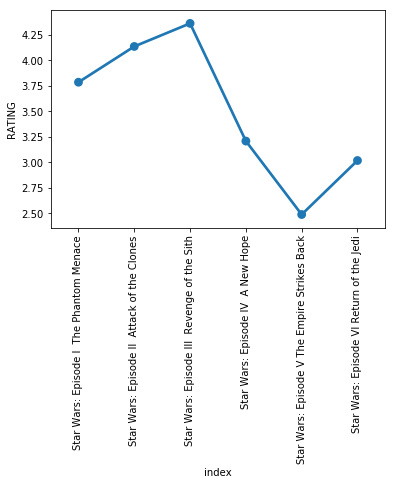

In [71]:
one=df_yes.loc[:,'Q4/O1':'Q4/O6']
one=one.mean(axis=0)
one=pd.DataFrame(one)
one=one.reset_index()
#one.columns
m=sns.pointplot(x="index", y=one.columns[1], data=one)
m.set(ylabel='RATING')
m.set_xticklabels(['Star Wars: Episode I  The Phantom Menace', 'Star Wars: Episode II  Attack of the Clones','Star Wars: Episode III  Revenge of the Sith','Star Wars: Episode IV  A New Hope','Star Wars: Episode V The Empire Strikes Back','Star Wars: Episode VI Return of the Jedi'], rotation='vertical', fontsize=10)

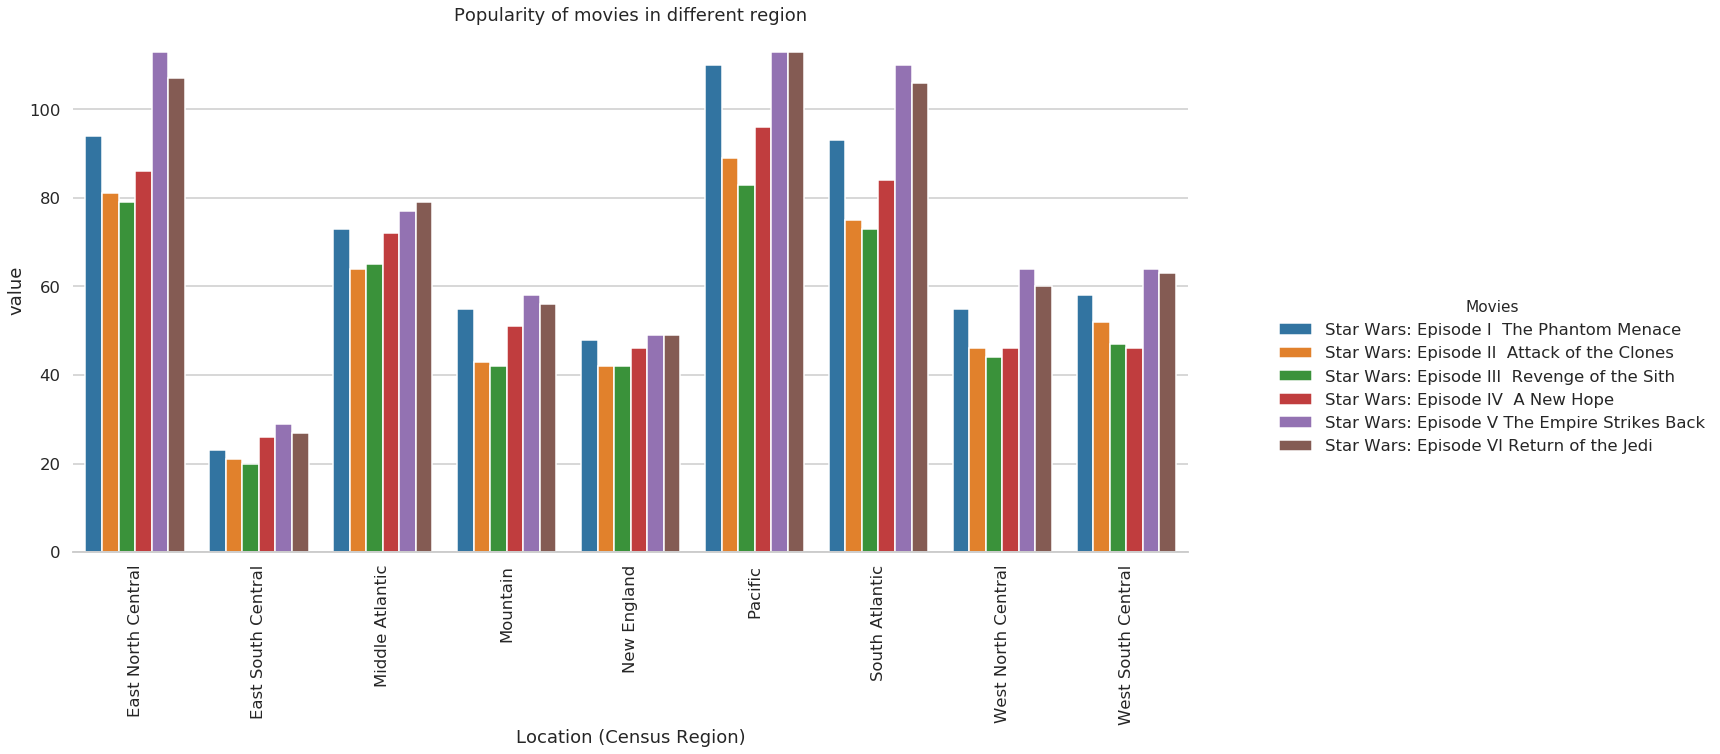

In [72]:
loc_1=df_yes.groupby('Location (Census Region)').sum().loc[:,'Q3/O1':'Q3/O6']
loc_1=loc_1.reset_index()
loc_1=pd.melt(loc_1,id_vars=['Location (Census Region)'])
sns.set_style("whitegrid")
sns.set_context("talk")
loc_1=sns.catplot(data=loc_1,kind="bar",x='Location (Census Region)',y='value',hue='variable',orient = "v",legend_out=True)
axes = loc_1.axes.flatten()
axes[0].set_title("Popularity of movies in different region")
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in loc_1.axes.flat]
loc_1.fig.set_figwidth(30)
loc_1.fig.set_figheight(10)
loc_1.despine(left=True)
# title
new_title = 'Movies'
loc_1._legend.set_title(new_title)
# replace labels
new_labels = ['Star Wars: Episode I  The Phantom Menace', 'Star Wars: Episode II  Attack of the Clones','Star Wars: Episode III  Revenge of the Sith','Star Wars: Episode IV  A New Hope','Star Wars: Episode V The Empire Strikes Back','Star Wars: Episode VI Return of the Jedi']
for t, l in zip(loc_1._legend.texts, new_labels): t.set_text(l)

In [73]:
loc_1=df_yes.groupby('Location (Census Region)').sum().loc[:,'Q3/O1':'Q3/O6']
loc_1=loc_1.reset_index()
loc_1=pd.melt(loc_1,id_vars=['Location (Census Region)'])
loc_1.groupby('Location (Census Region)').sum().reset_index()

,Location (Census Region),value
0,East North Central,560
1,East South Central,146
2,Middle Atlantic,430
3,Mountain,305
4,New England,276
5,Pacific,604
6,South Atlantic,541
7,West North Central,315
8,West South Central,330


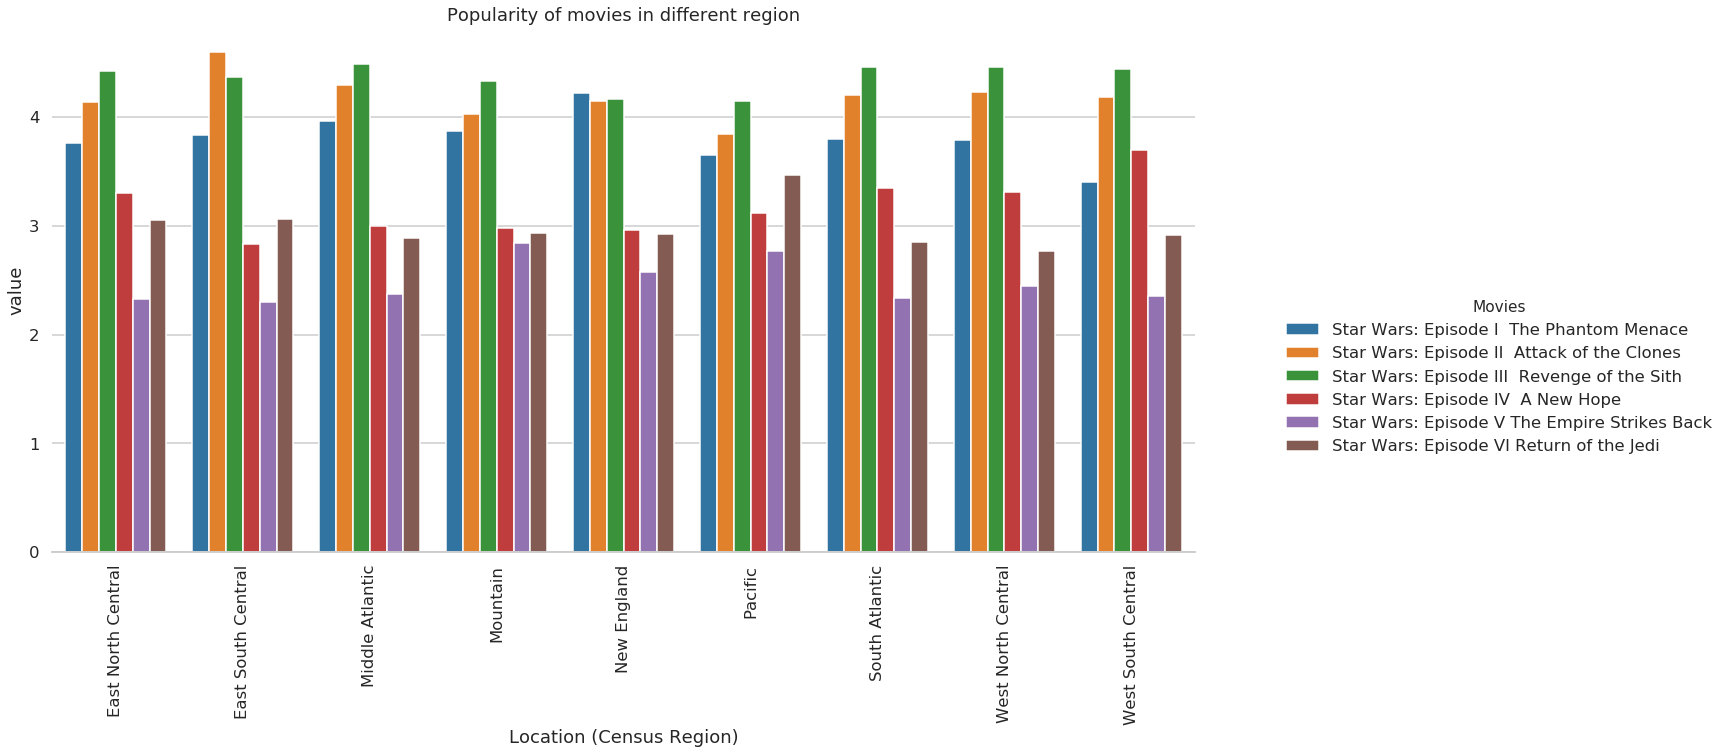

In [74]:
loc_1=df_yes.groupby('Location (Census Region)').mean().loc[:,'Q4/O1':'Q4/O6']
loc_1=loc_1.reset_index()
loc_1=pd.melt(loc_1,id_vars=['Location (Census Region)'])
sns.set_style("whitegrid")
sns.set_context("talk")
loc_1=sns.catplot(data=loc_1,kind="bar",x='Location (Census Region)',y='value',hue='variable',orient = "v",legend_out=True)
axes = loc_1.axes.flatten()
axes[0].set_title("Popularity of movies in different region")
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in loc_1.axes.flat]
loc_1.fig.set_figwidth(30)
loc_1.fig.set_figheight(10)
loc_1.despine(left=True)
# title
new_title = 'Movies'
loc_1._legend.set_title(new_title)
# replace labels
new_labels = ['Star Wars: Episode I  The Phantom Menace', 'Star Wars: Episode II  Attack of the Clones','Star Wars: Episode III  Revenge of the Sith','Star Wars: Episode IV  A New Hope','Star Wars: Episode V The Empire Strikes Back','Star Wars: Episode VI Return of the Jedi']
for t, l in zip(loc_1._legend.texts, new_labels): t.set_text(l)

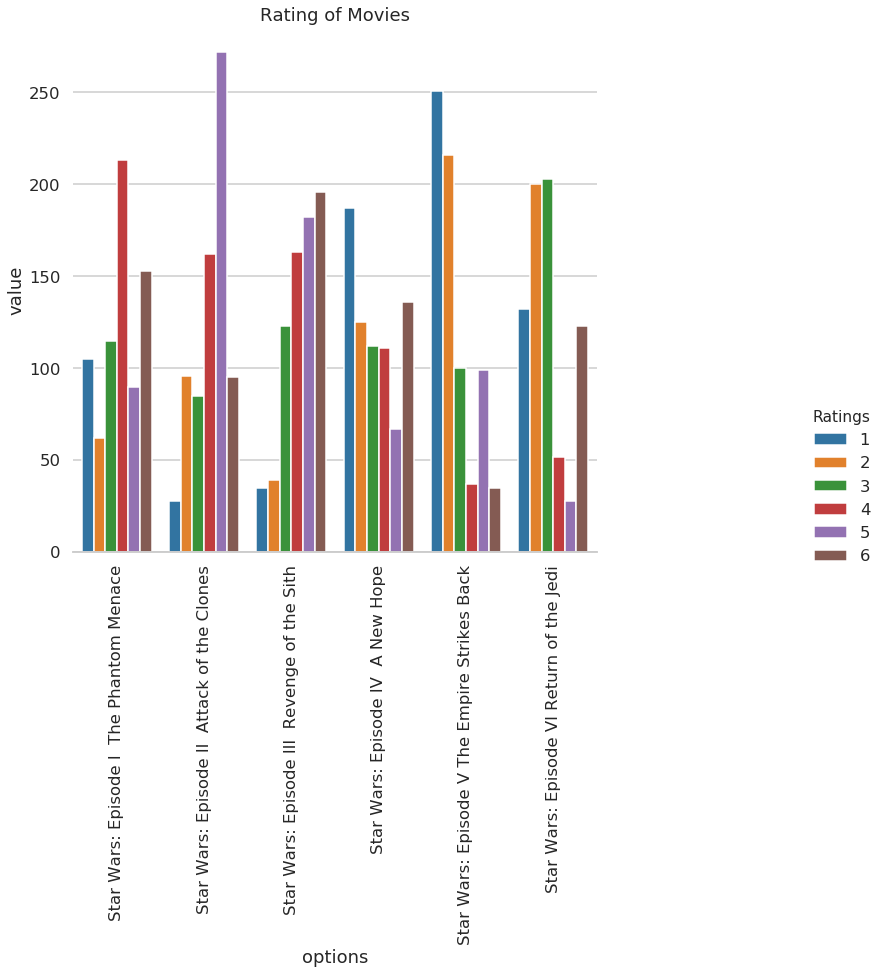

In [75]:
q4=['Q4/O1','Q4/O2','Q4/O3','Q4/O4','Q4/O5','Q4/O6']
one=[]
two=[]
three=[]
four=[]
five=[]
six=[]

for col in q4:
    a=df_yes[col].value_counts()
    a=dict(a)
    one.append(a[1])
    two.append(a[2])
    three.append(a[3])
    four.append(a[4])
    five.append(a[5])
    six.append(a[6])

grouped_bar=pd.DataFrame({'options':q4,'1':one,'2':two,'3':three,'4':four,'5':five,'6':six})
grouped_bar['options']=grouped_bar['options'].replace(options)
x=pd.melt(grouped_bar,id_vars=["options"])

sns.set_style("whitegrid")
sns.set_context("talk")
g=sns.catplot(data=x,kind="bar",x='options',y='value',hue='variable',orient = "v")
axes = g.axes.flatten()
axes[0].set_title("Rating of Movies")
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.set_figwidth(22)
g.fig.set_figheight(10)
g.despine(left=True)


# title
new_title = 'Ratings'
g._legend.set_title(new_title)

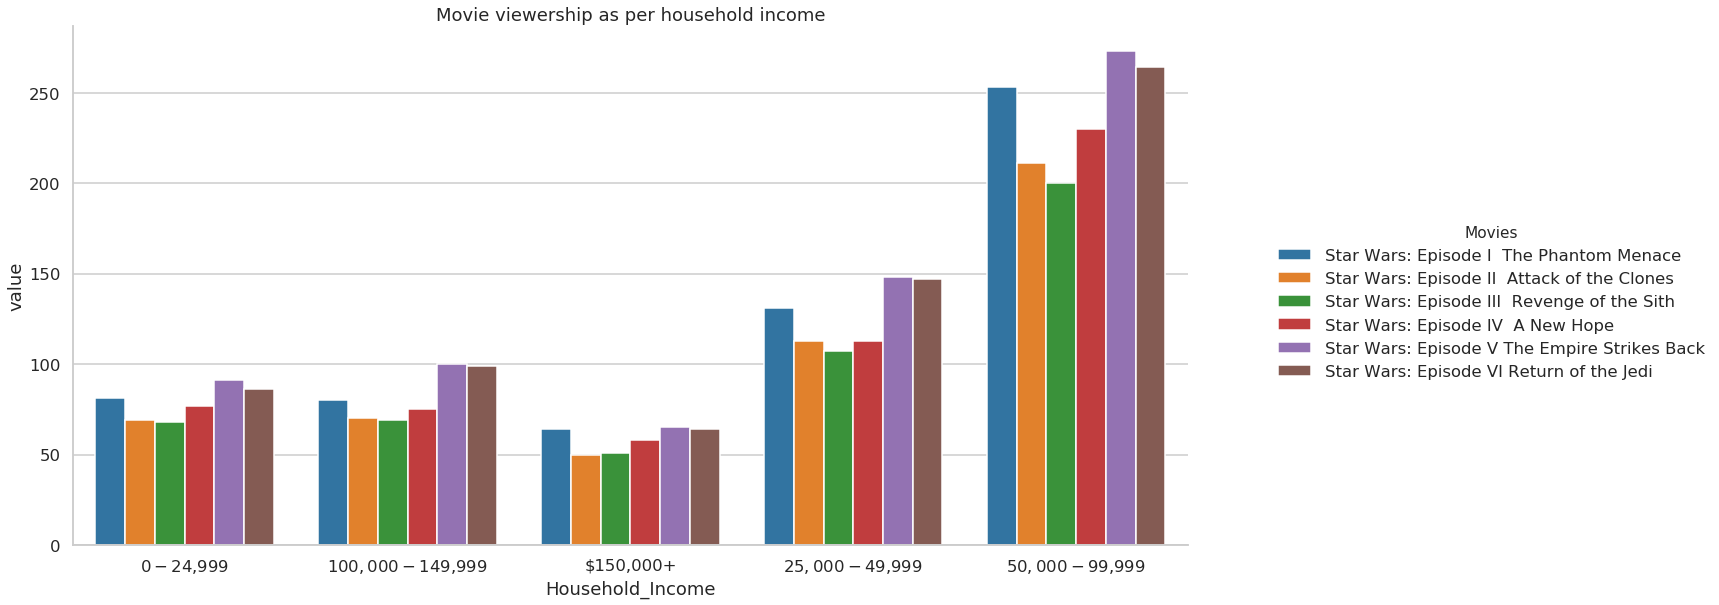

In [76]:
hhi=df_yes.groupby(['Household Income']).sum().loc[:,'Q3/O1':'Q3/O6']
hhi['Household_Income']=hhi.index
hhi=pd.melt(hhi,id_vars=['Household_Income'])
sns.set_style("whitegrid")
sns.set_context("talk")
m=sns.catplot(data=hhi,kind="bar",x='Household_Income',y='value',hue='variable',orient = "v")
m.fig.set_figwidth(30)
m.fig.set_figheight(10)

axes = m.axes.flatten()
axes[0].set_title("Movie viewership as per household income")

# title
new_title = 'Movies'
m._legend.set_title(new_title)
# replace labels
new_labels = ['Star Wars: Episode I  The Phantom Menace', 'Star Wars: Episode II  Attack of the Clones','Star Wars: Episode III  Revenge of the Sith','Star Wars: Episode IV  A New Hope','Star Wars: Episode V The Empire Strikes Back','Star Wars: Episode VI Return of the Jedi']
for t, l in zip(m._legend.texts, new_labels): t.set_text(l)

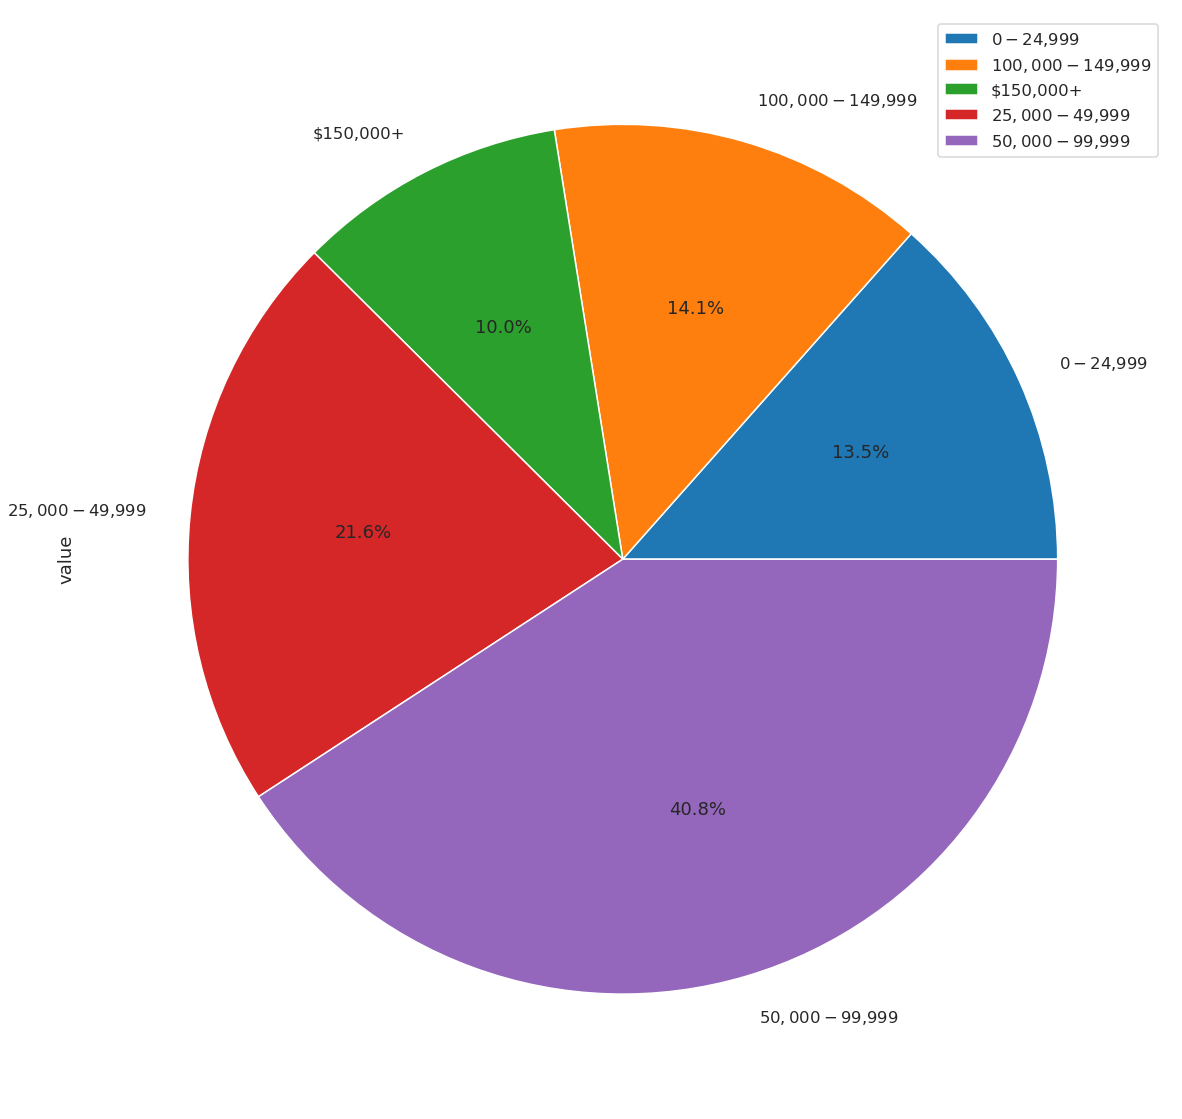

In [77]:
hhi=df_yes.groupby(['Household Income']).sum().loc[:,'Q3/O1':'Q3/O6']
hhi['Household_Income']=hhi.index
hhi=pd.melt(hhi,id_vars=['Household_Income'])
hhi=hhi.drop('variable',axis=1)
hhi.groupby('Household_Income').sum().reset_index().plot(kind='pie',y='value',autopct='%1.1f%%',labels=hhi['Household_Income'],figsize=(20, 20))

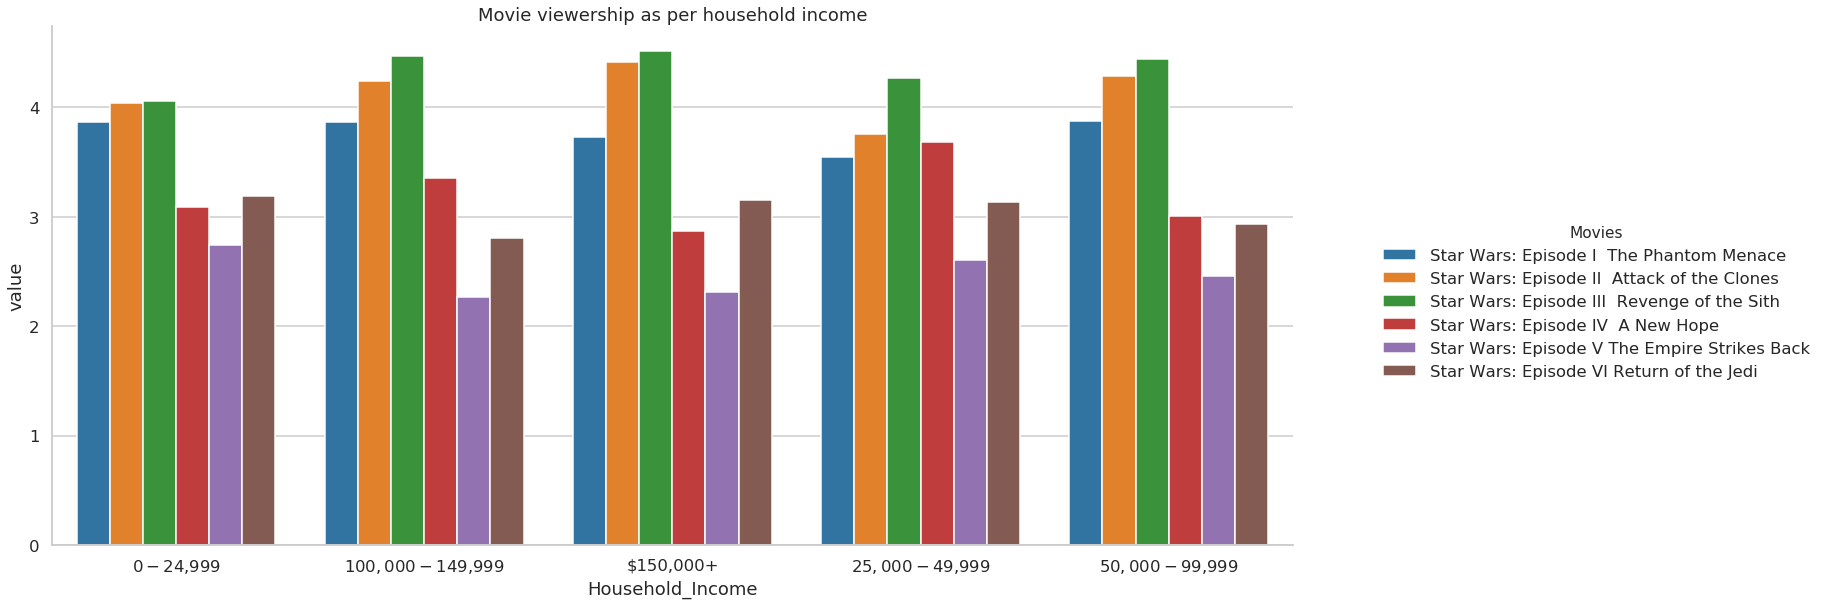

In [78]:
hhi=df_yes.groupby(['Household Income']).mean().loc[:,'Q4/O1':'Q4/O6']
hhi['Household_Income']=hhi.index
hhi=pd.melt(hhi,id_vars=['Household_Income'])
sns.set_style("whitegrid")
sns.set_context("talk")
m=sns.catplot(data=hhi,kind="bar",x='Household_Income',y='value',hue='variable',orient = "v")
m.fig.set_figwidth(30)
m.fig.set_figheight(10)

axes = m.axes.flatten()
axes[0].set_title("Movie viewership as per household income")

# title
new_title = 'Movies'
m._legend.set_title(new_title)
# replace labels
new_labels = ['Star Wars: Episode I  The Phantom Menace', 'Star Wars: Episode II  Attack of the Clones','Star Wars: Episode III  Revenge of the Sith','Star Wars: Episode IV  A New Hope','Star Wars: Episode V The Empire Strikes Back','Star Wars: Episode VI Return of the Jedi']
for t, l in zip(m._legend.texts, new_labels): t.set_text(l)

In [79]:
age_avr_rat=df_yes.groupby(['Age']).mean().loc[:,'Q4/O1':'Q4/O6']
age_avr_rat=age_avr_rat.reset_index()
age_avr_rat=pd.melt(age_avr_rat,id_vars=['Age'])

[Text(0, 0, 'Star Wars: Episode I  The Phantom Menace'),
 Text(0, 0, 'Star Wars: Episode II  Attack of the Clones'),
 Text(0, 0, 'Star Wars: Episode III  Revenge of the Sith'),
 Text(0, 0, 'Star Wars: Episode IV  A New Hope'),
 Text(0, 0, 'Star Wars: Episode V The Empire Strikes Back'),
 Text(0, 0, 'Star Wars: Episode VI Return of the Jedi')]

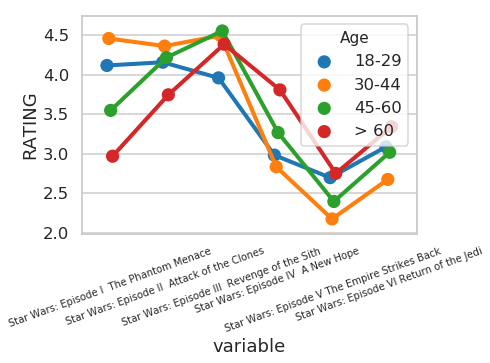

In [80]:
ax=sns.pointplot(x="variable", y="value", hue="Age",
...                    data=age_avr_rat, dodge=True)
sns.set(rc={'figure.figsize':(21.7,8.27)})
ax.set(ylabel='RATING')
ax.set_xticklabels(['Star Wars: Episode I  The Phantom Menace', 'Star Wars: Episode II  Attack of the Clones','Star Wars: Episode III  Revenge of the Sith','Star Wars: Episode IV  A New Hope','Star Wars: Episode V The Empire Strikes Back','Star Wars: Episode VI Return of the Jedi'], rotation=20, fontsize=10)

[Text(0, 0, 'Star Wars: Episode I  The Phantom Menace'),
 Text(0, 0, 'Star Wars: Episode II  Attack of the Clones'),
 Text(0, 0, 'Star Wars: Episode III  Revenge of the Sith'),
 Text(0, 0, 'Star Wars: Episode IV  A New Hope'),
 Text(0, 0, 'Star Wars: Episode V The Empire Strikes Back'),
 Text(0, 0, 'Star Wars: Episode VI Return of the Jedi')]

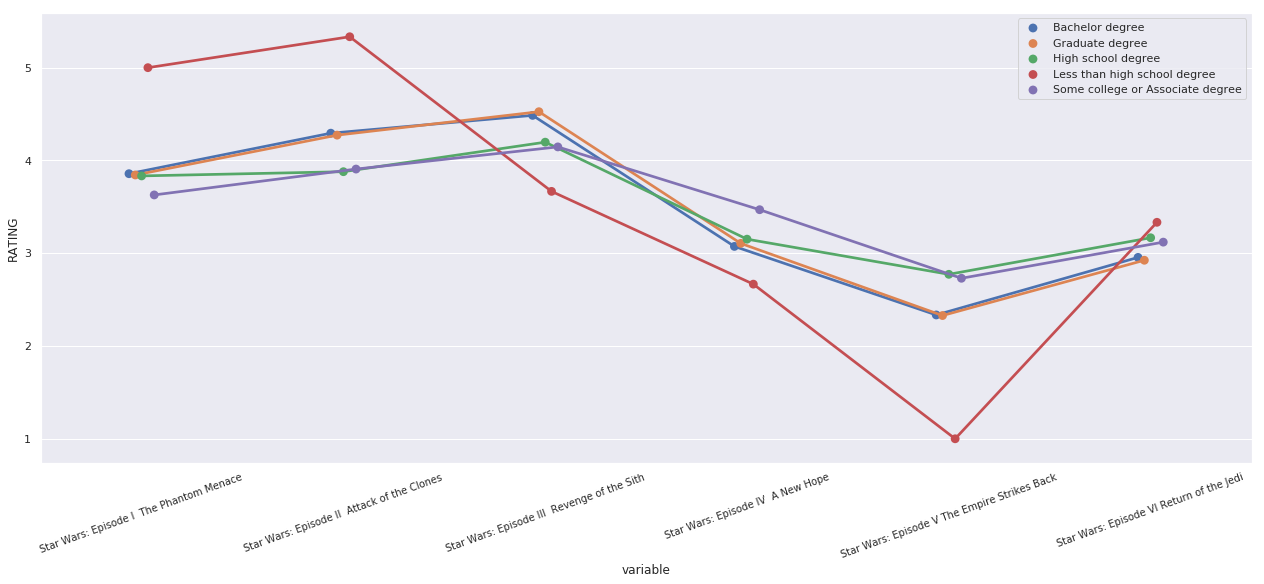

In [81]:
age_avr_rat=df_yes.groupby(['Education']).mean().loc[:,'Q4/O1':'Q4/O6']
age_avr_rat=age_avr_rat.reset_index()
age_avr_rat=pd.melt(age_avr_rat,id_vars=['Education'])

ax=sns.pointplot(x="variable", y="value", hue="Education",data=age_avr_rat, dodge=True)
ax.legend()
sns.set(rc={'figure.figsize':(21.7,8.27)})
ax.set(ylabel='RATING')
ax.set_xticklabels(['Star Wars: Episode I  The Phantom Menace', 'Star Wars: Episode II  Attack of the Clones','Star Wars: Episode III  Revenge of the Sith','Star Wars: Episode IV  A New Hope','Star Wars: Episode V The Empire Strikes Back','Star Wars: Episode VI Return of the Jedi'], rotation=20, fontsize=10)

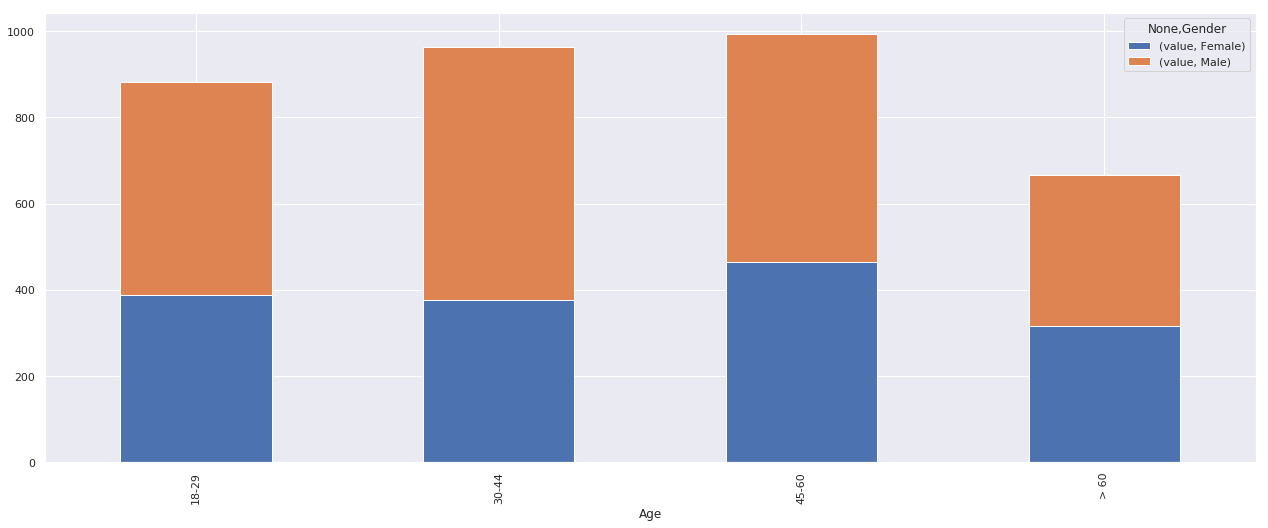

In [82]:
asum=df_yes.groupby(['Age','Gender']).sum().loc[:,'Q3/O1':'Q3/O6']
m=asum.reset_index()
m['value']=m.sum(axis=1)
des_col=['Age','Gender','value']
m=m[des_col]
m = m.pivot(columns='Gender',index='Age').fillna(0)
m.plot.bar(stacked=True)

In [83]:
#a=df_yes.loc[:,['Gender','Q4/O1']]
#sns.stripplot(x="Gender", y="Q4/O1", data=a, jitter=0.05)


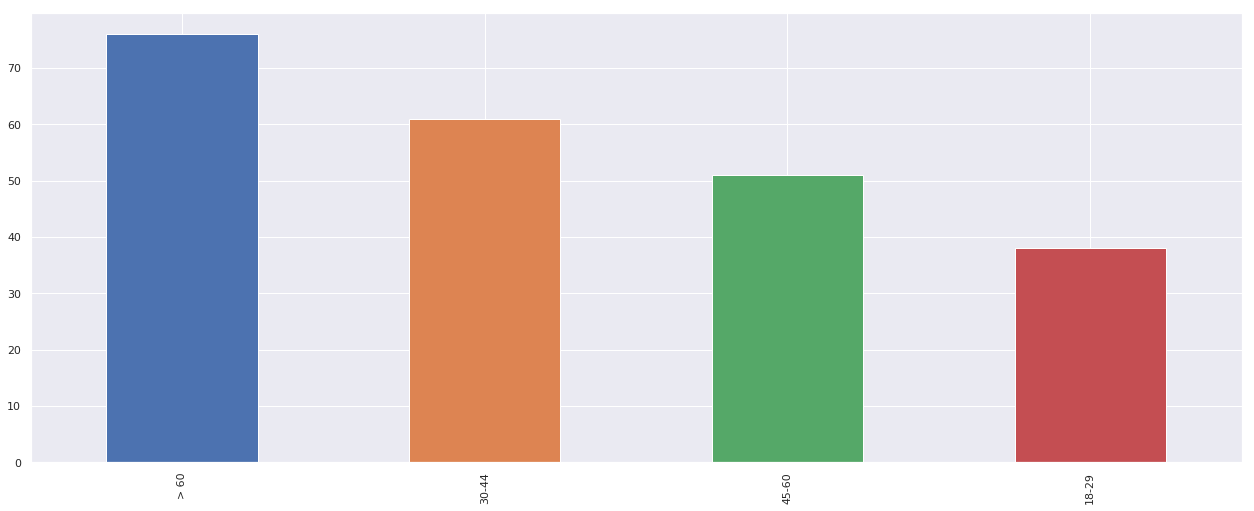

In [84]:
df_no=df.loc[df['Q1']=='No']
df_no['Age'].value_counts().plot.bar()

In [85]:
#3333333333333333333333333333333333333333333333333

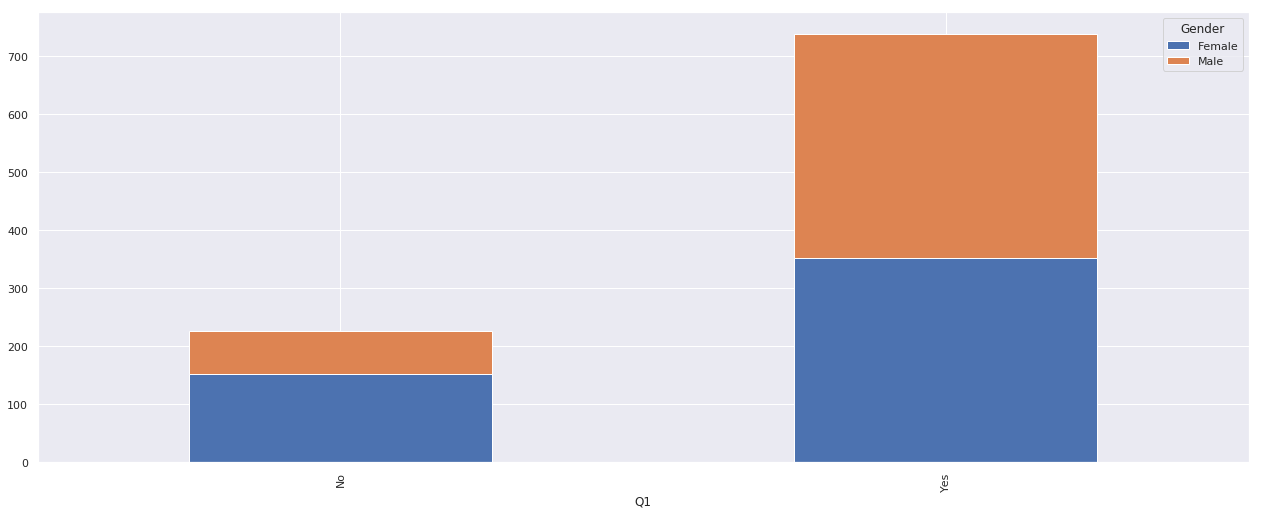

In [86]:
df_full_1 = pd.concat([df_yes.iloc[:,1:], df.loc[df['Q1']=='No','Q1':]])
df_full_1=df_full_1.reset_index()
df_full_1['Gender']=df_full_1['Gender'].replace(gender_dict)
data_crosstab = pd.crosstab(df_full_1['Q1'], 
                            df_full_1['Gender'],  
                               margins = False)
data_crosstab.plot.bar(stacked=True)

In [87]:
data_crosstab

Gender,Female,Male
Q1,,
No,152,74
Yes,352,386


In [88]:
scipy.stats.chi2_contingency(data_crosstab)#do the writeup

(25.755480602667824,
 3.8752499411326713e-07,
 1,
 array([[118.15767635, 107.84232365],
        [385.84232365, 352.15767635]]))

In [89]:
x=df_yes.loc[:,['Education','Q4/O3']]
x.columns=['Education', 'value']
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm=ols('value ~ C(Education)',data=x).fit()
table=sm.stats.anova_lm(lm)
print(table)

                 df       sum_sq   mean_sq         F    PR(>F)
C(Education)    4.0    22.816293  5.704073  2.903812  0.021122
Residual      733.0  1439.861214  1.964340       NaN       NaN


In [90]:
x=x.groupby('Education').mean().reset_index()
x

,Education,value
0,Bachelor degree,4.485714
1,Graduate degree,4.525253
2,High school degree,4.196970
3,Less than high school degree,3.666667
4,Some college or Associate degree,4.146018


In [91]:
x.groupby('Education').count()

,value
Education,
Bachelor degree,1
Graduate degree,1
High school degree,1
Less than high school degree,1
Some college or Associate degree,1


([<matplotlib.axis.XTick at 0x7fcf39d427b8>,
 <a list of 5 Text xticklabel objects>)

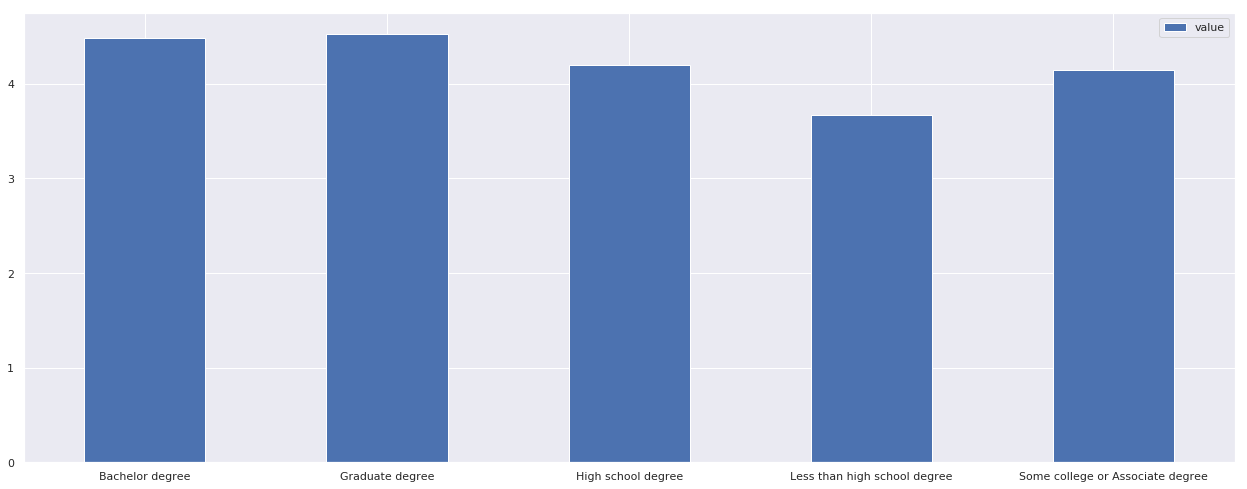

In [92]:
x.plot.bar()
labels=x['Education']
plt.xticks(x.index,labels, rotation=0)

In [93]:
x=[]
aa=df_yes.loc[:,'Q5/O1':'Q5/O14']
for c in aa.columns:
    x.append(aa[c].value_counts().sort_index().values)

x=pd.DataFrame(x)
x=x.transpose()
x['relationship']=['Neither favorably nor unfavorably (neutral)','Somewhat favorably','Somewhat unfavorably','Unfamiliar (N/A)','Very favorably','Somewhat unfavorably']
x.columns=['Han Solo','Luke Skywalker','Princess Leia Organa','Anakin Skywalker','Obi Wan Kenobi','Emperor Palpatine','Darth Vader','Lando Calrissian','Boba Fett','C-3P0','R2 D2','Jar Jar Binks','Padme Amidala','Yoda','relationship']
x

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,relationship
0,38,35,43,115,39,188,72,209,220,73,53,146,192,44,Neither favorably nor unfavorably (neutral)
1,132,193,182,248,140,128,159,211,142,206,163,117,167,127,Somewhat favorably
2,4,9,9,76,4,59,89,56,84,20,8,91,51,6,Somewhat unfavorably
3,14,6,7,45,12,142,8,129,122,13,8,96,149,8,Unfamiliar (N/A)
4,549,493,493,218,538,103,277,125,128,420,502,95,149,547,Very favorably
5,1,2,4,36,5,118,133,8,42,6,4,193,30,6,Somewhat unfavorably


In [94]:
#being of diffiernt gender makes you like or dislike hime
columns=['Q5/O1','Gender']
x=df_yes.loc[:,columns]

data_crosstab = pd.crosstab(x['Q5/O1'], 
                            df_full_1['Gender'],  
                               margins = False)

In [95]:
scipy.stats.chi2_contingency(data_crosstab)

(1.902604474386418, 0.8624507905276039, 5, array([[ 14.86189684,  14.13810316],
        [ 50.22296173,  47.77703827],
        [  2.04991681,   1.95008319],
        [  6.14975042,   5.85024958],
        [234.20299501, 222.79700499],
        [  0.5124792 ,   0.4875208 ]]))

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

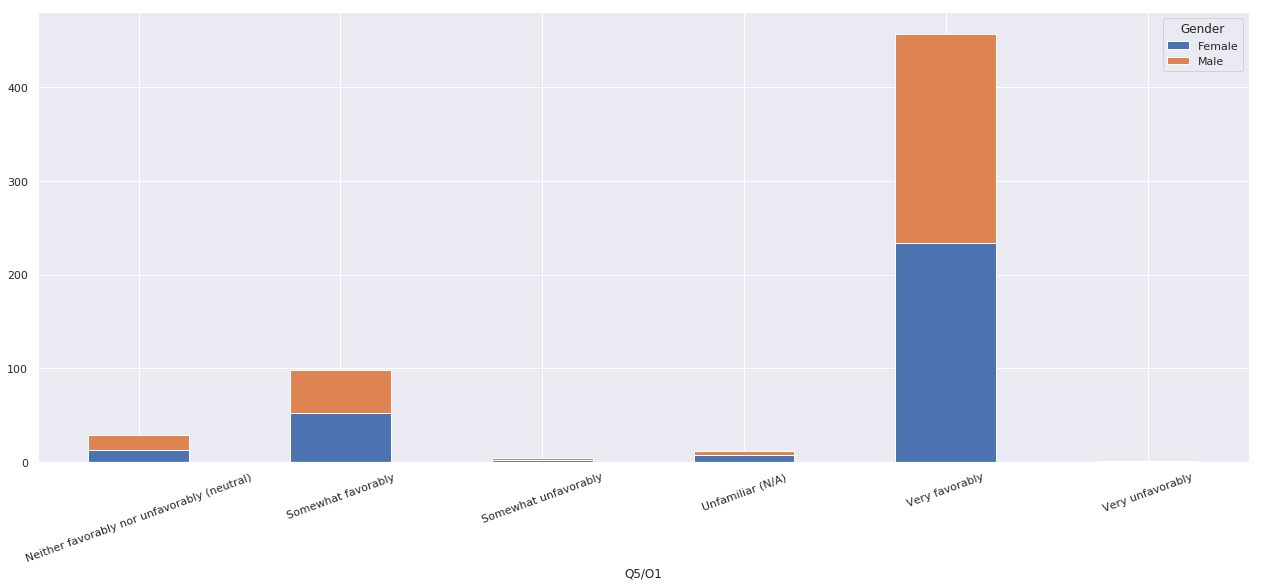

In [96]:
data_crosstab.plot.bar(stacked=True)
plt.xticks(rotation=20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

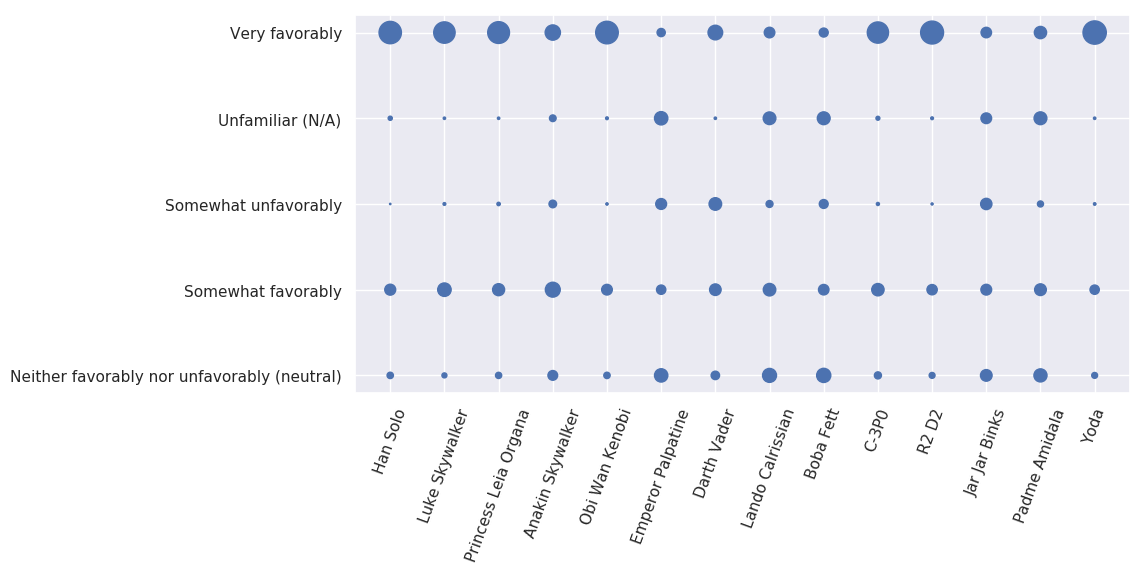

In [97]:
figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')

x=[]
aa=df_yes.loc[df_yes['Gender']=='Female','Q5/O1':'Q5/O14']
for c in aa.columns:
    x.append(aa[c].value_counts().sort_index().values)

x=pd.DataFrame(x)
x=x.transpose()
x['relationship']=['Neither favorably nor unfavorably (neutral)','Somewhat favorably','Somewhat unfavorably','Unfamiliar (N/A)','Very favorably','Somewhat unfavorably']
x.columns=['Han Solo','Luke Skywalker','Princess Leia Organa','Anakin Skywalker','Obi Wan Kenobi','Emperor Palpatine','Darth Vader','Lando Calrissian','Boba Fett','C-3P0','R2 D2','Jar Jar Binks','Padme Amidala','Yoda','relationship']
x=pd.melt(x,id_vars=['relationship'])
plt.scatter(x="variable", y="relationship", s="value", data=x)
plt.xticks(rotation=70)

In [98]:
def long_pot(col_car,col):
    figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
    x=[]
    aa=df_yes.loc[df_yes[col]==col_car,'Q5/O1':'Q5/O14']
    for c in aa.columns:
        x.append(aa[c].value_counts().sort_index().values)
    x=pd.DataFrame(x)
    x=x.transpose()
    x['relationship']=['Neither favorably nor unfavorably (neutral)','Somewhat favorably','Somewhat unfavorably','Unfamiliar (N/A)','Very favorably','Somewhat unfavorably']
    x.columns=['Han Solo','Luke Skywalker','Princess Leia Organa','Anakin Skywalker','Obi Wan Kenobi','Emperor Palpatine','Darth Vader','Lando Calrissian','Boba Fett','C-3P0','R2 D2','Jar Jar Binks','Padme Amidala','Yoda','relationship']
    x=pd.melt(x,id_vars=['relationship'])
    plt.scatter(x="variable", y="relationship", s="value", data=x)
    plt.xticks(rotation=70)

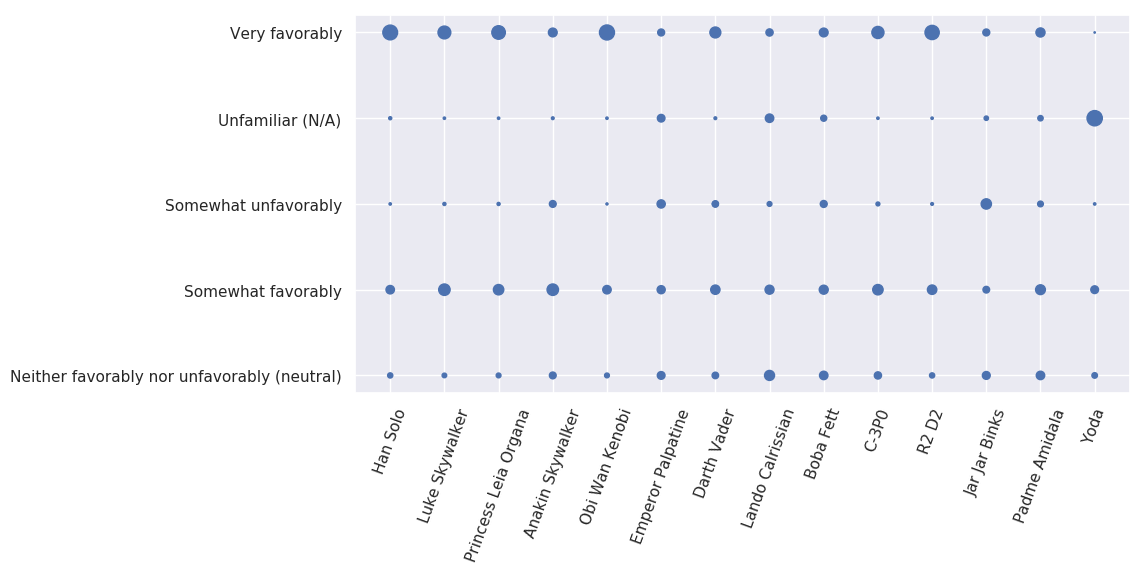

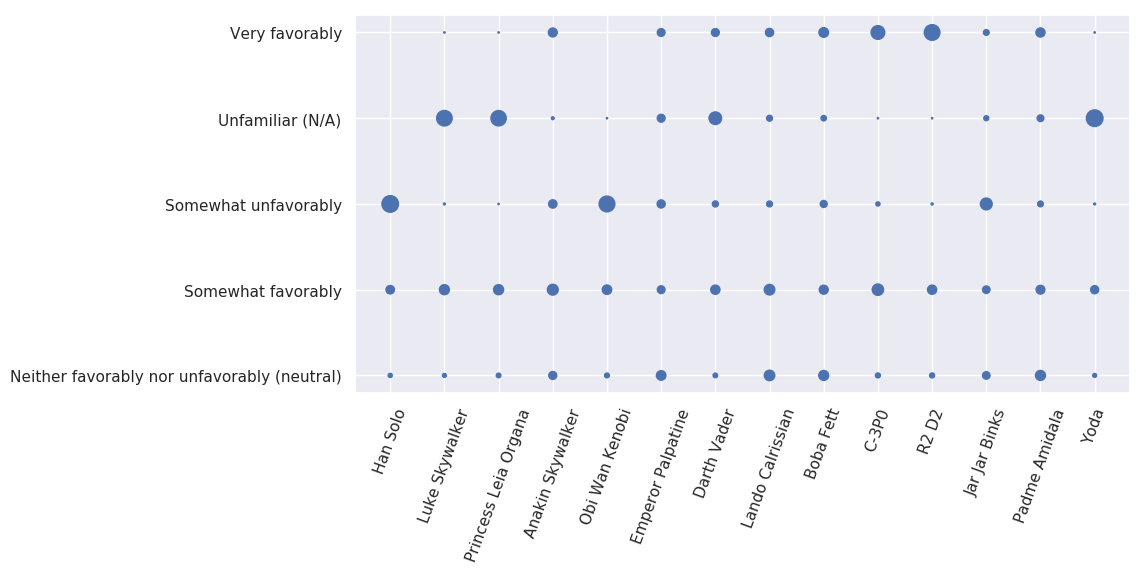

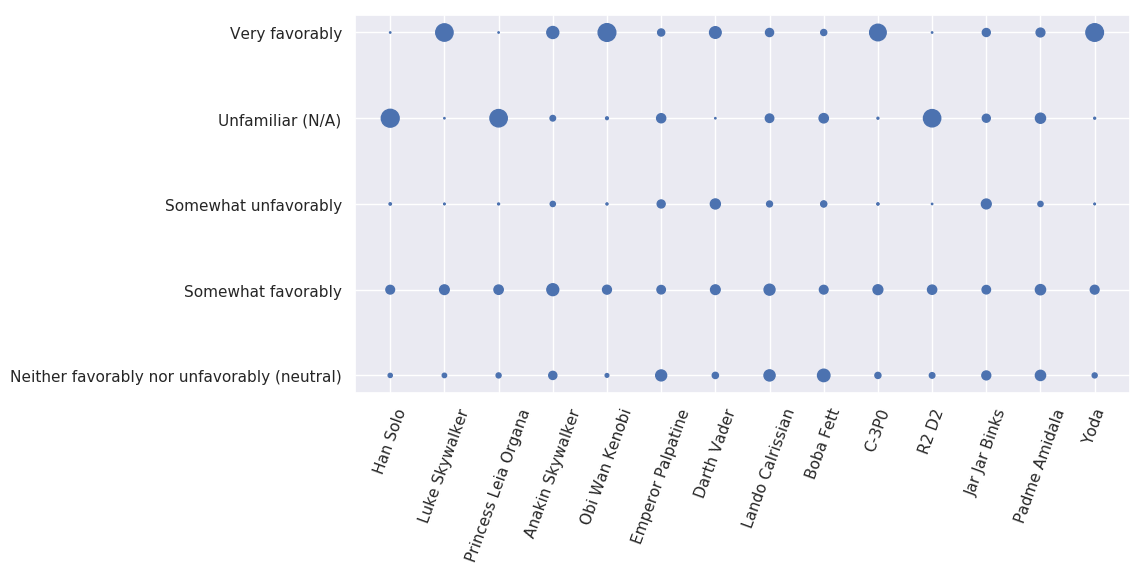

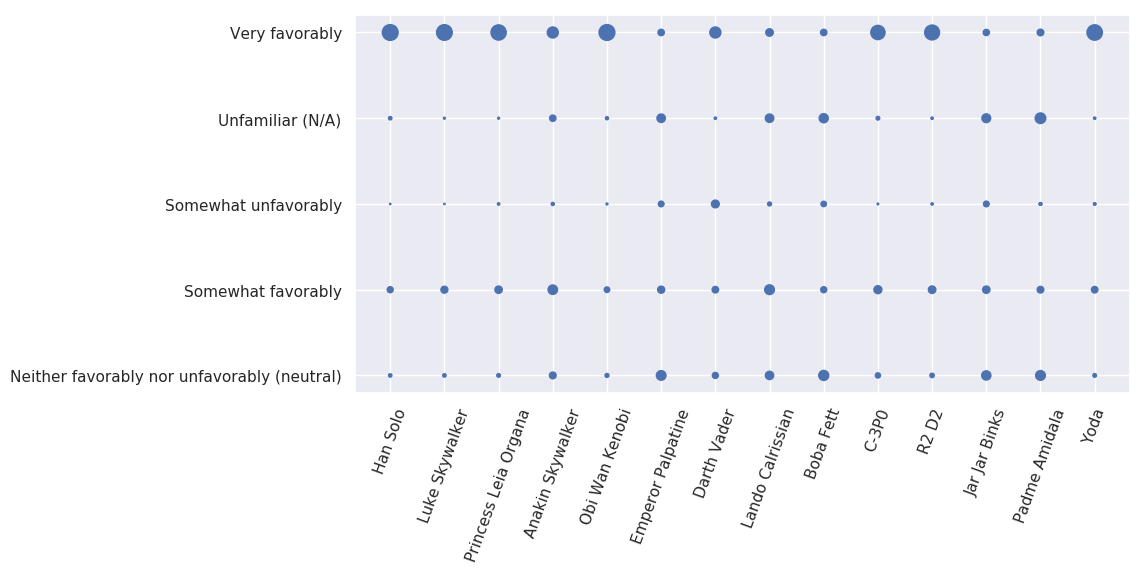

In [99]:
plot=df_yes['Age'].value_counts().sort_index().index

for do in plot:
    long_pot(do,'Age')

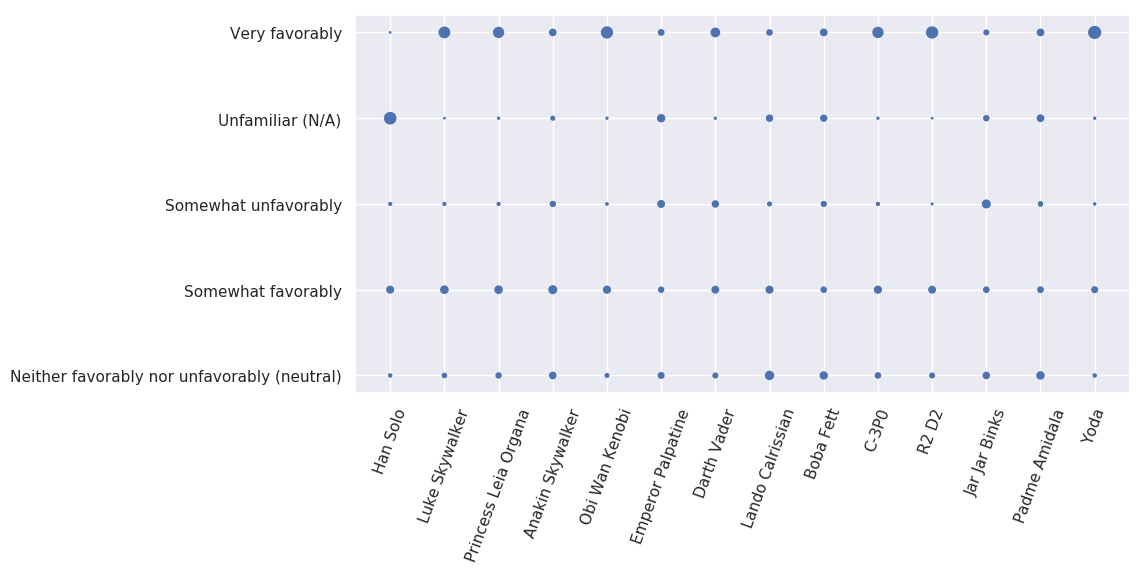

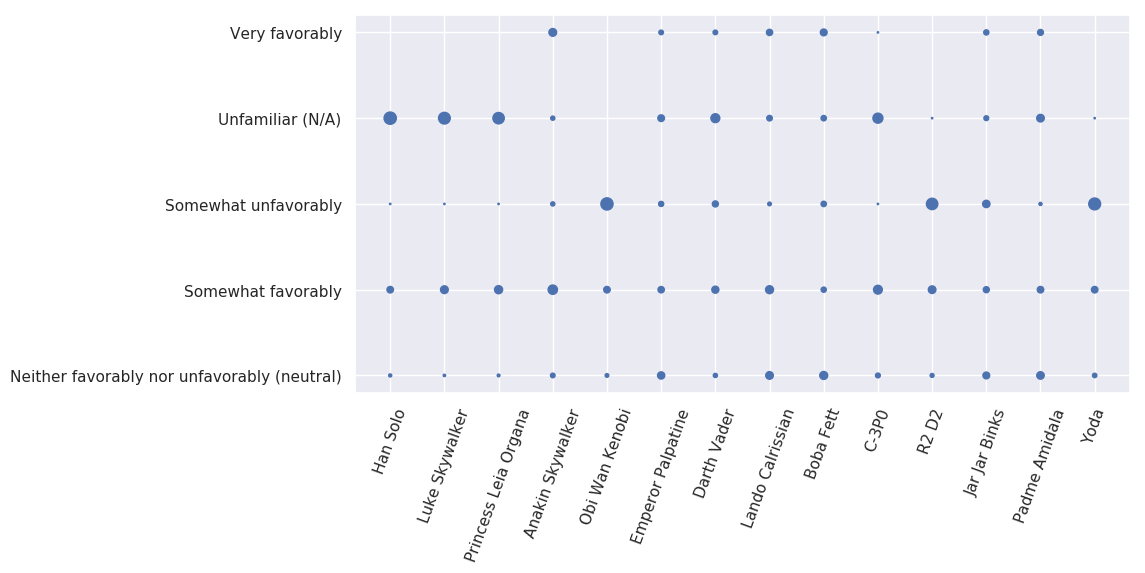

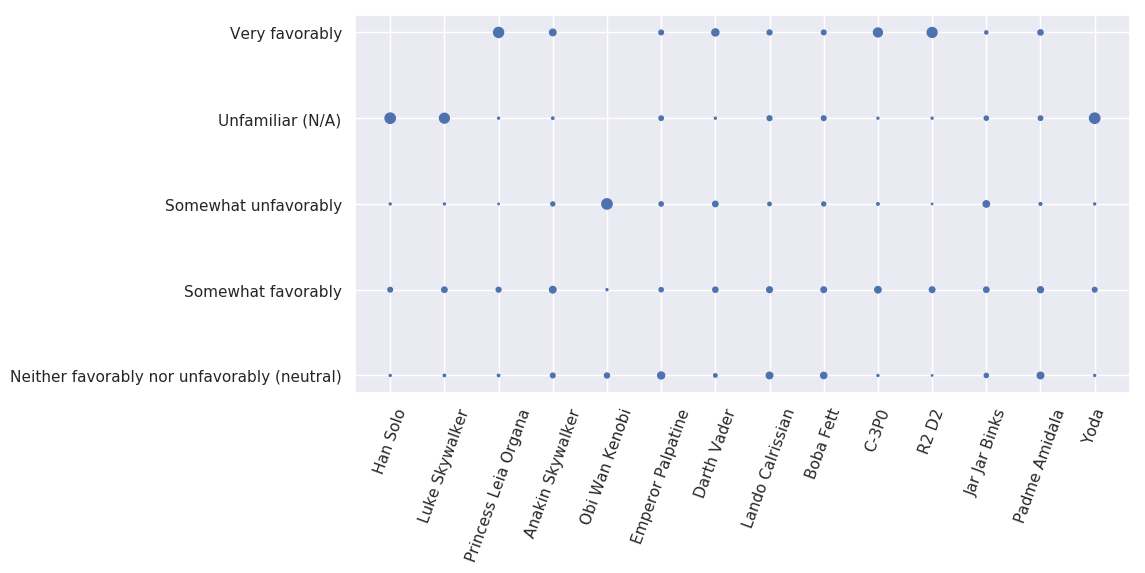

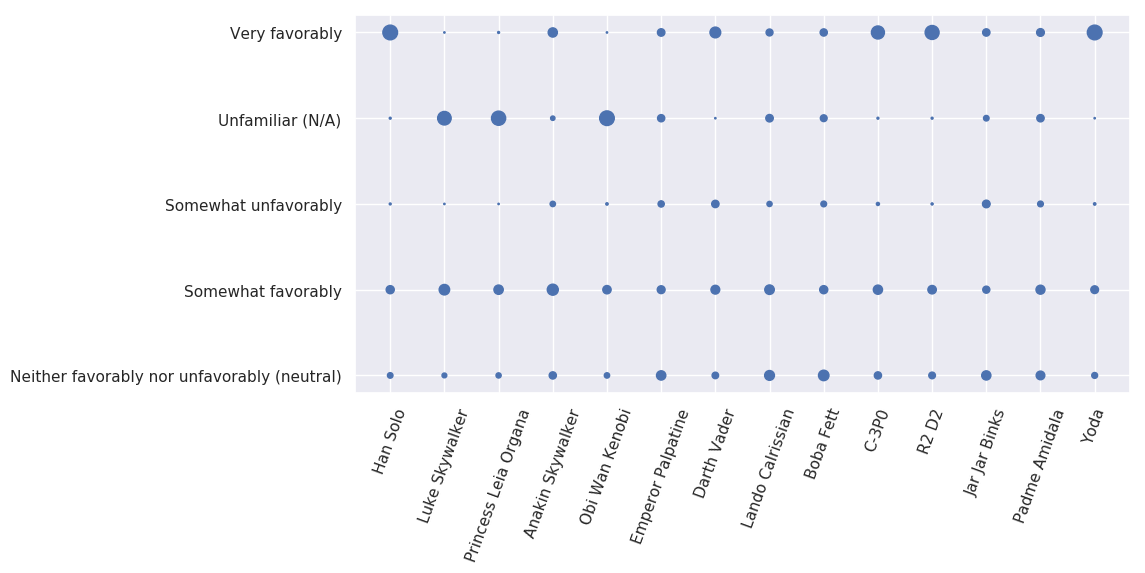

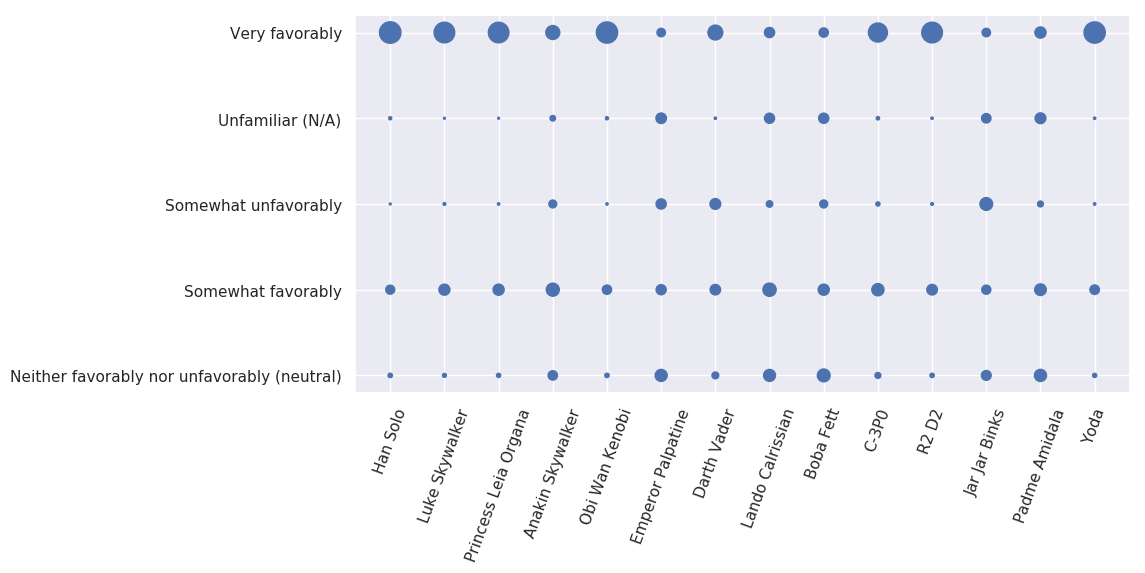

In [100]:
plot=df_yes['Household Income'].value_counts().sort_index().index

for do in plot:
    long_pot(do,'Household Income')

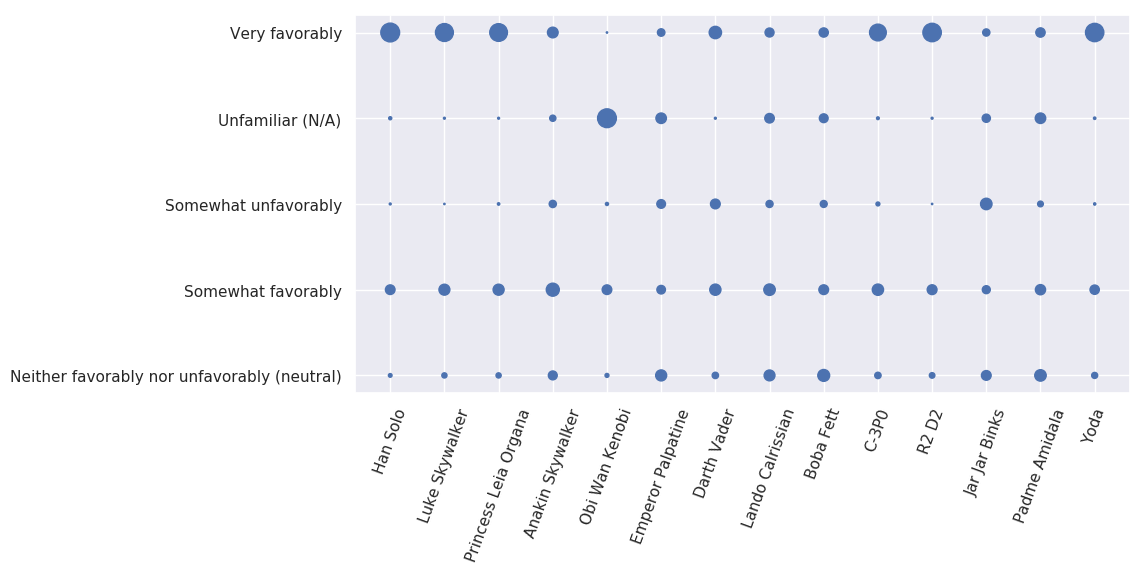

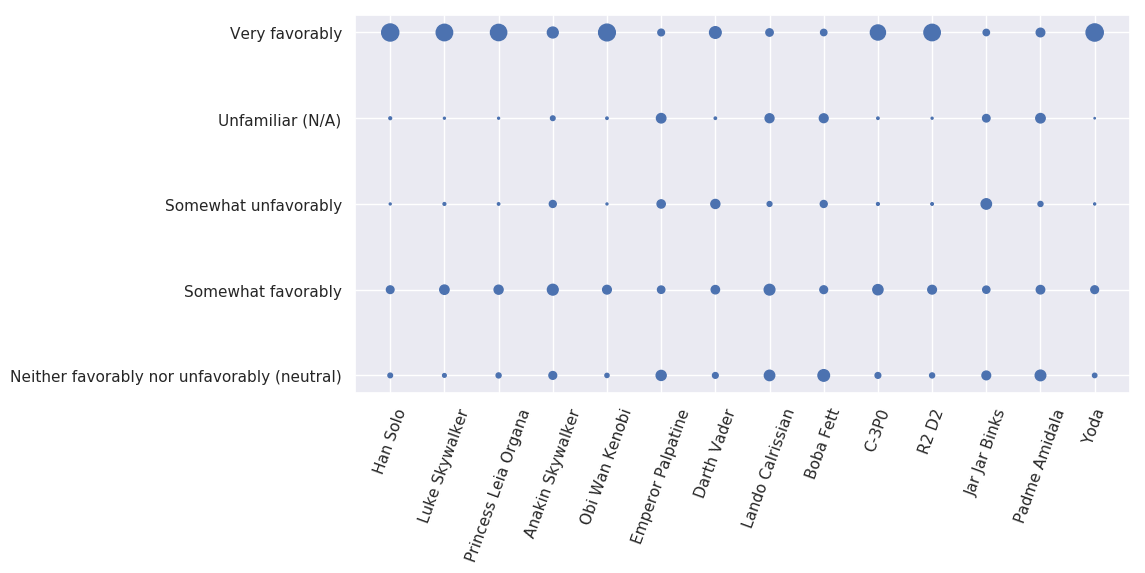

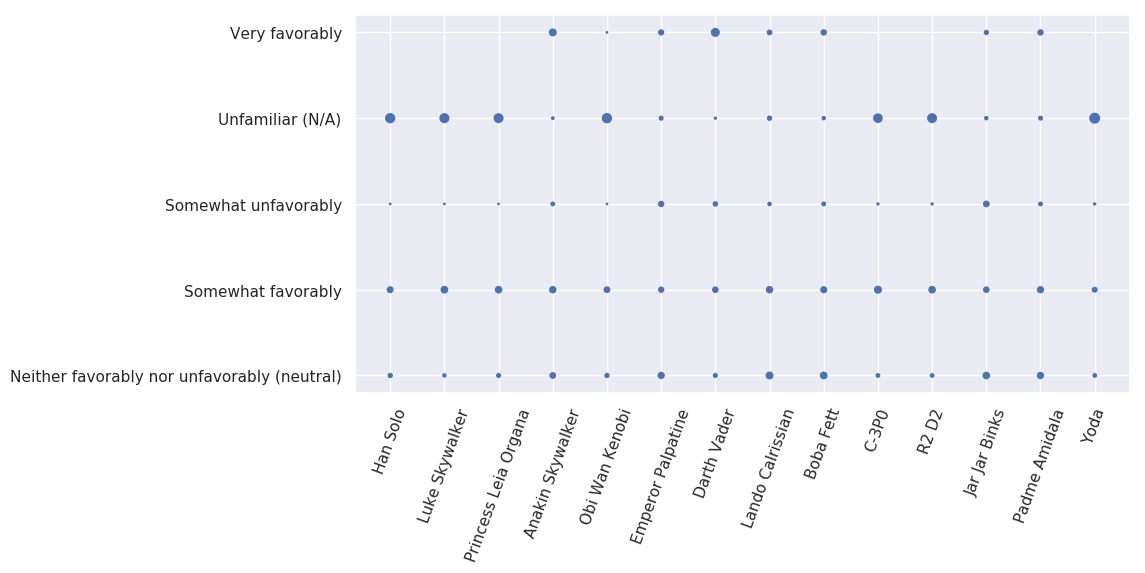

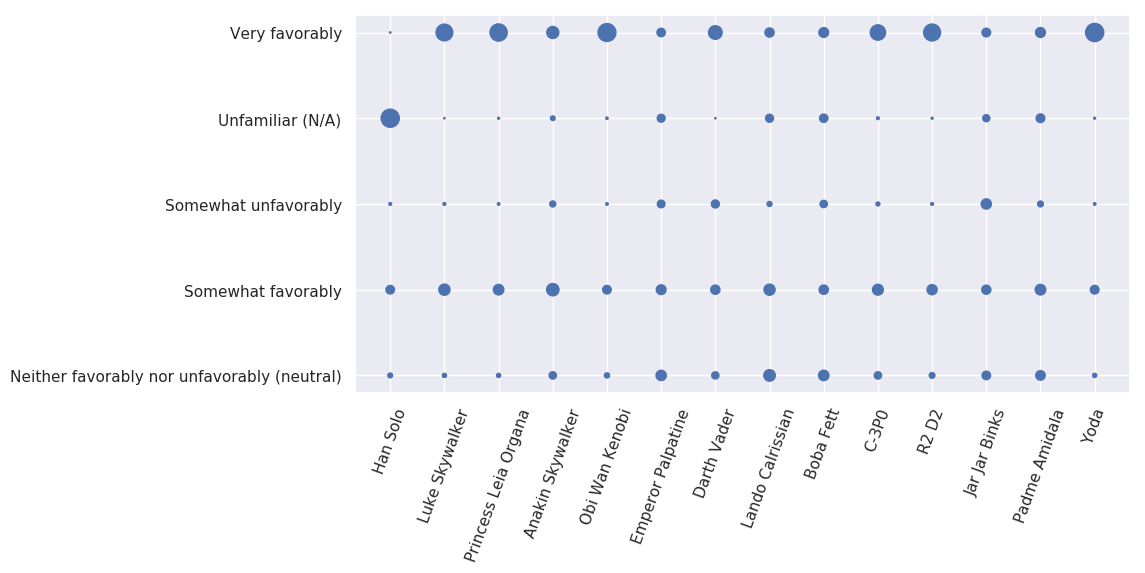

In [101]:
plot=['Bachelor degree', 'Graduate degree', 'High school degree', 'Some college or Associate degree']

for do in plot:
    long_pot(do,'Education')

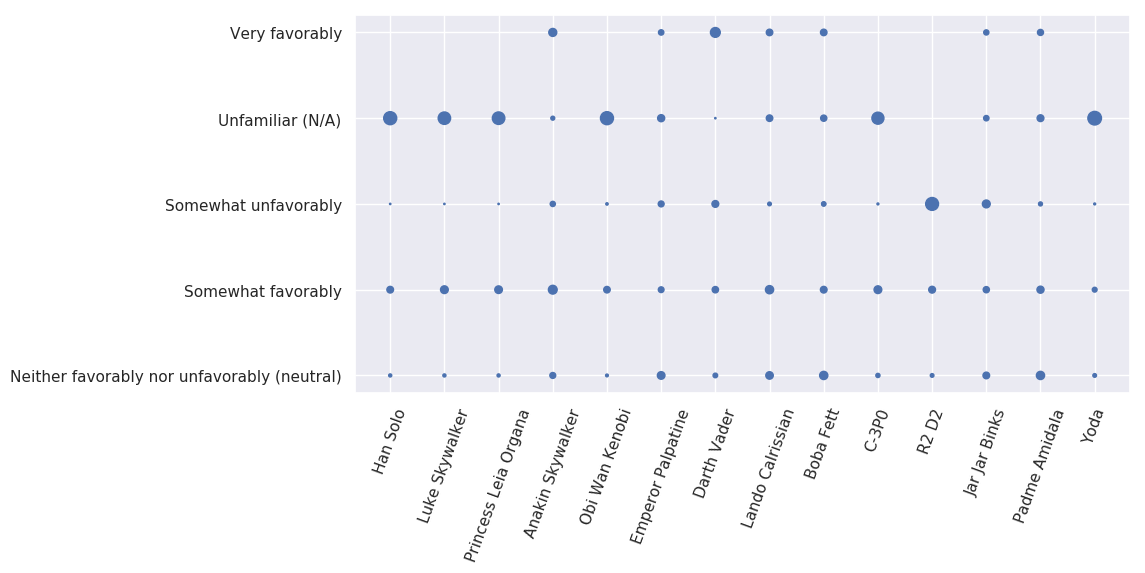

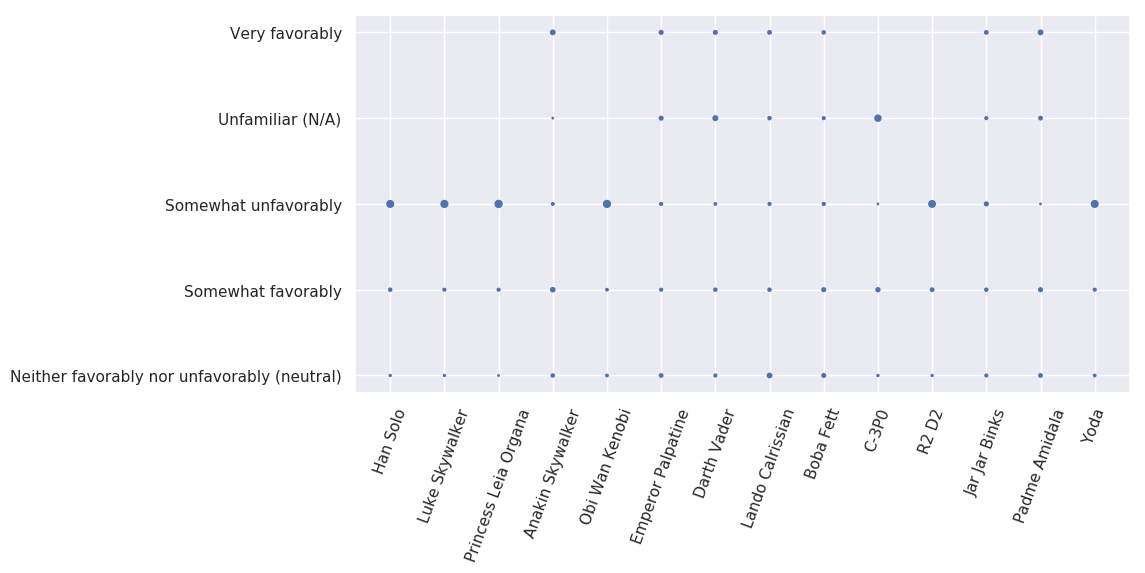

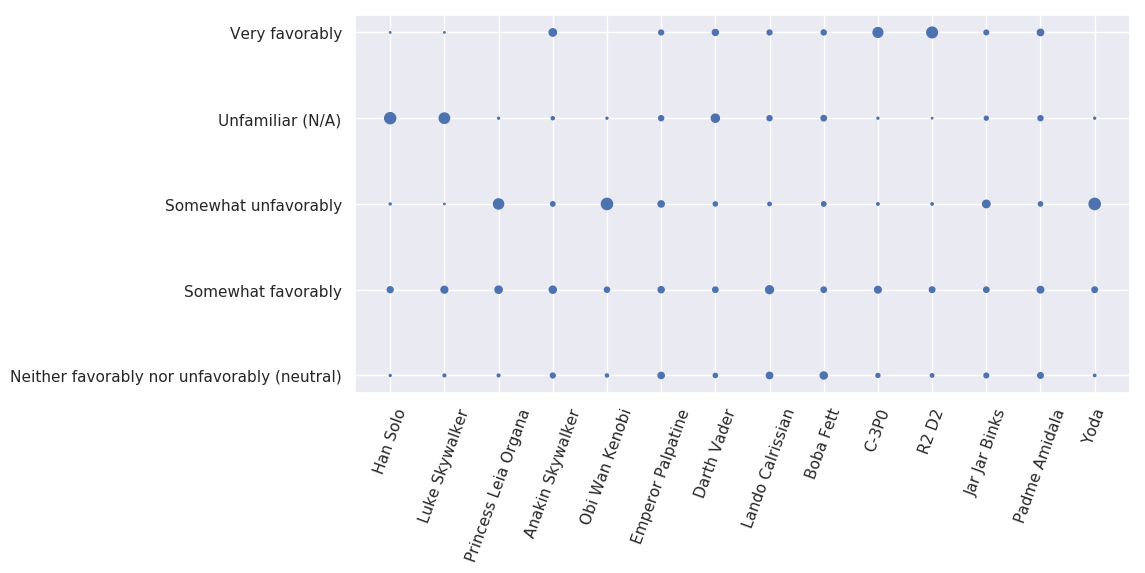

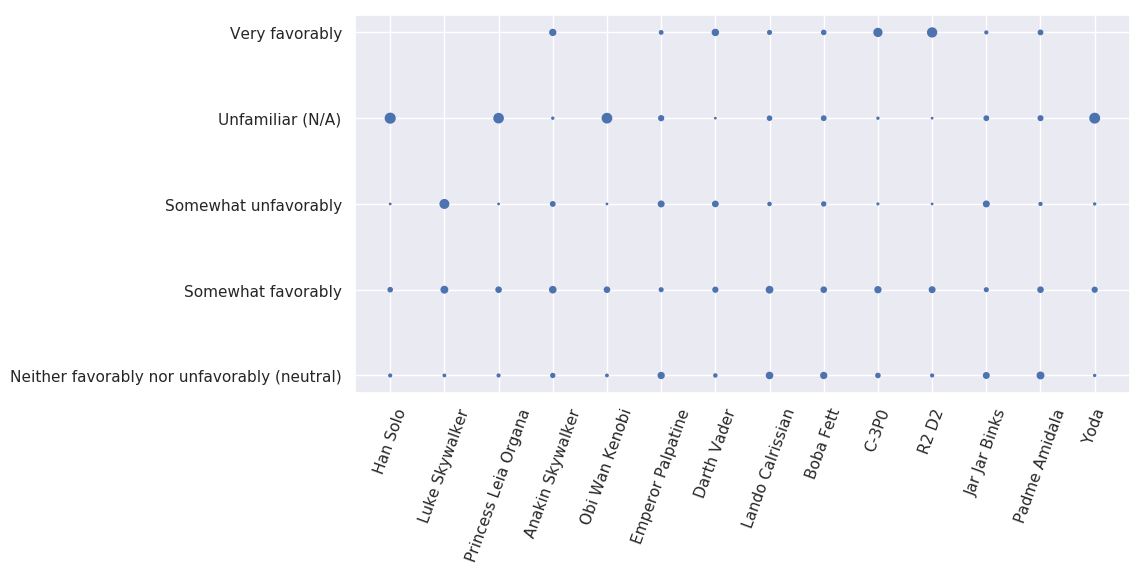

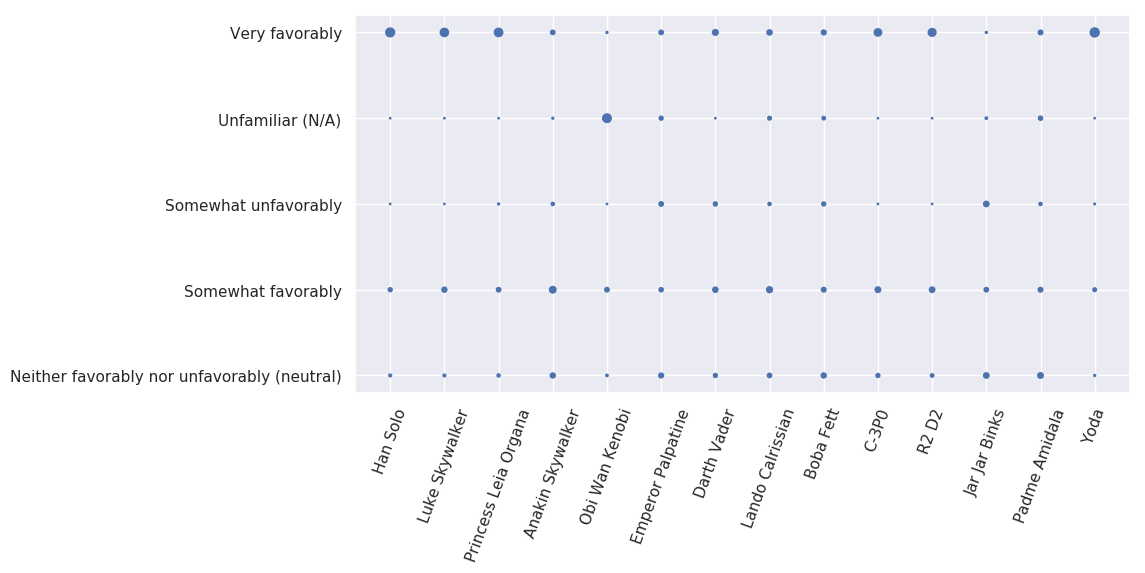

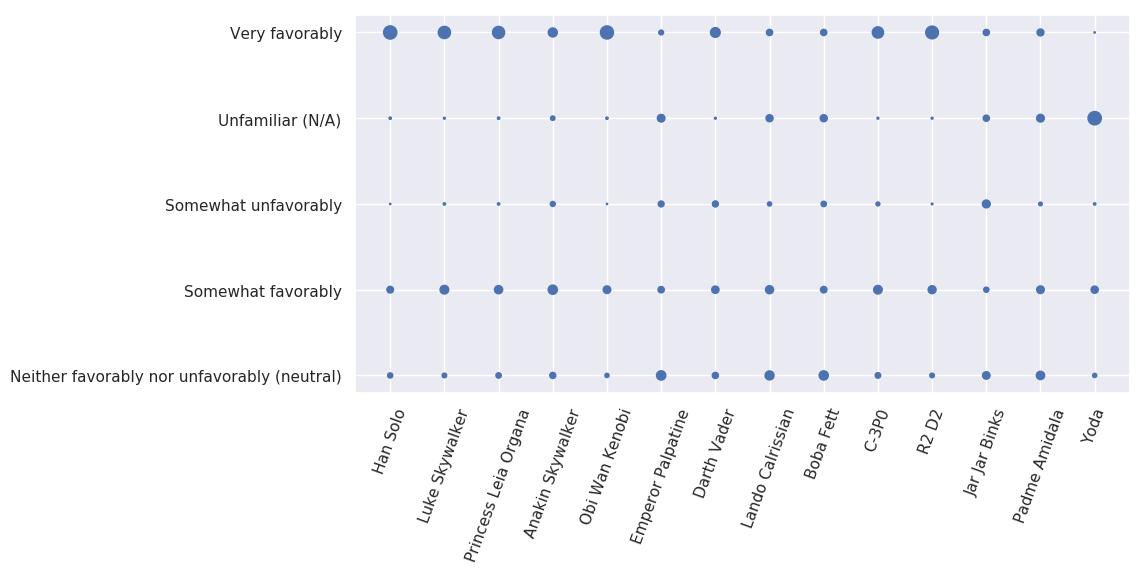

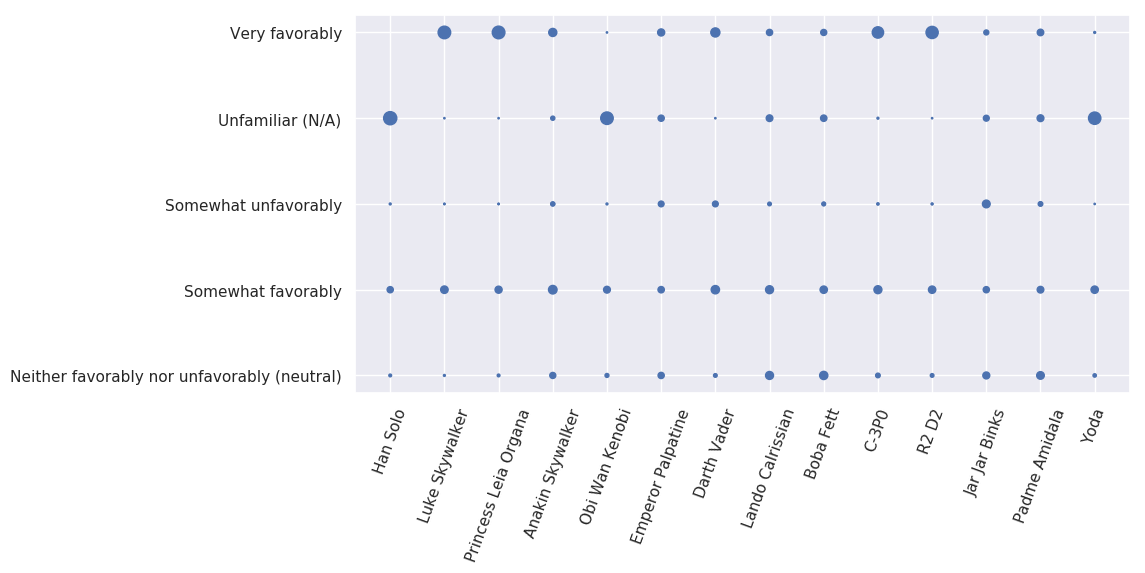

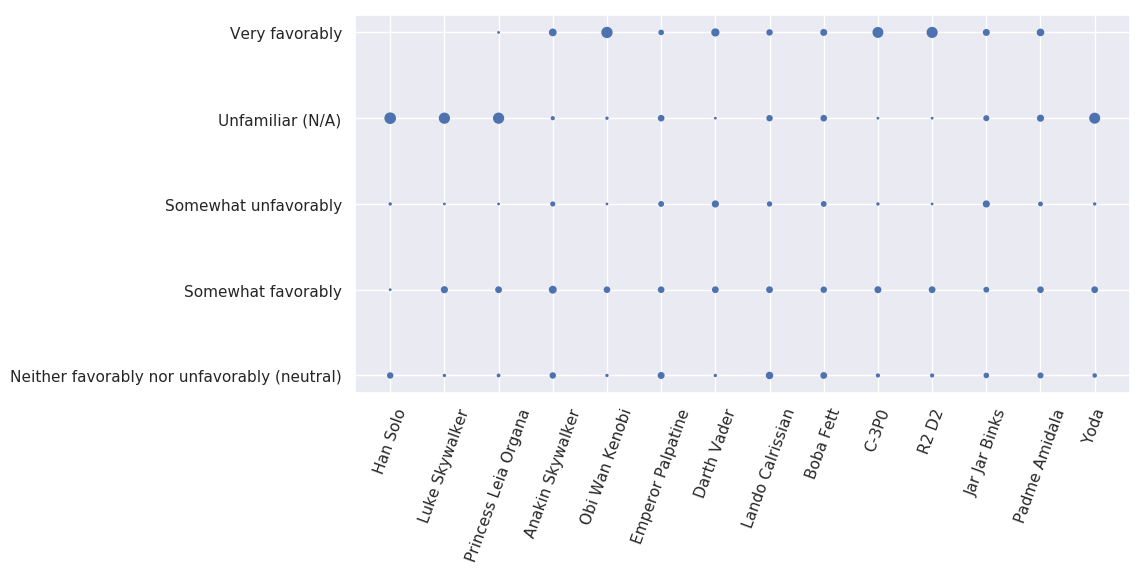

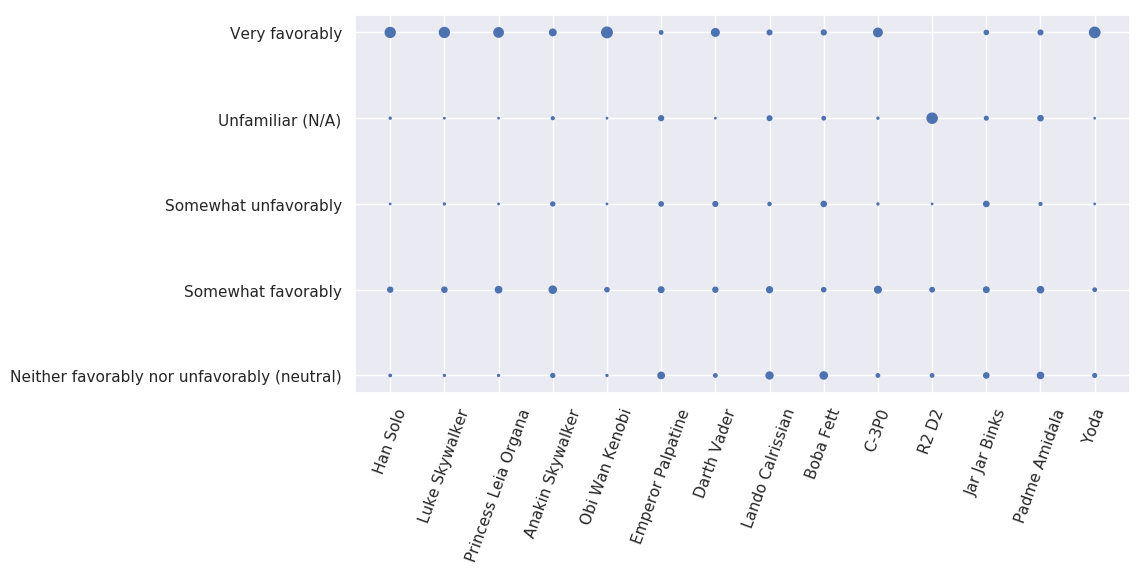

In [102]:
plot=df_yes['Location (Census Region)'].value_counts().sort_index().index

for do in plot:
    long_pot(do,'Location (Census Region)')

In [ ]:
#THANKYOU HOPE YOU LIKED IT